#### Assignment 1  - XIANG PAN (E0509875)
This answer sheet contains your answer to questions in Section 1~4. Sentences in <span style="color:blue">blue</span> indicates questions to be answered. 

For open questions, please organize your answer into "points" to ease our grading efforts. For example, an answer to "What is the most popular item? Explain you answer and describe any assumptions you’ve made." should look like:

> The most popular item ID is 12345. The reason is that:
> - reason 1
> - reason 2
> 
> I've made the following assumptions:
> - assumption 1
> - assumption 2

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Remember to save this Jupyter notebook as __YourNameInLumiNUS_YourNUSNETID.ipynb__.

**Import all libraries and load data here**

In [310]:
# This is a code cell
# -- Import all libraries and load data in this cell --

import joblib
import pandas as pd
import numpy as np
record = pd.read_csv("./record.csv")

X = joblib.load('assignment1.data')

In [213]:
print(X)
print(record)

[[-7.89974146e+00  6.10186662e+00]
 [-4.50351686e-01  9.86593888e-01]
 [-8.66107299e+00  5.46637644e+00]
 [-1.11271680e+00  1.06159679e+00]
 [ 7.17196896e+00 -4.80656905e+00]
 [ 7.92220024e+00 -5.05961257e+00]
 [ 5.69166147e+00  6.54414857e+00]
 [-5.63101724e-01  4.77585985e-01]
 [ 3.07612560e+00  8.30446331e+00]
 [ 7.82458722e+00 -5.68003479e+00]
 [ 8.38103105e+00 -5.31252932e+00]
 [ 6.15993797e+00 -4.82219188e+00]
 [-9.61274364e-01  3.07167553e-01]
 [-7.73525025e+00  5.08669037e+00]
 [ 5.80564749e+00 -4.92468325e+00]
 [ 6.36812570e+00 -4.96120496e+00]
 [-1.26150519e+00  5.12918221e-01]
 [ 4.75340306e+00  7.26663737e+00]
 [ 7.71871582e+00 -4.62866061e+00]
 [ 5.36102366e+00  6.31461630e+00]
 [-9.49817641e+00  5.44879873e+00]
 [ 7.20974465e+00 -4.90570698e+00]
 [-1.36917959e+00 -6.69042028e-01]
 [ 4.30251695e+00  6.88026895e+00]
 [ 7.17459972e+00 -4.56417302e+00]
 [ 7.07647947e+00 -2.93082638e+00]
 [-9.38986466e+00  4.01610565e+00]
 [ 5.67000030e+00  6.14953734e+00]
 [-7.15602394e+00  5

### Section 1 - Clustering and Initialization (20 points)

<span style="color:blue"> Consider the nine data points (A, B, C, D, E, F, G, H, I) in Fig. 1. Taking the points D, E, and F as the initial cluster centers, apply the K-Means algorithm on the data, with the number of clusters K = 3. (Note that it is easier to do this manually; you don't need to do it using code) At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. Do you think this clustering result is satisfactory? </span>

In [74]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def kmeans_plot(dataSet,k,epoch,centroids,cluster):
    print(centroids)
    sampleNum, col = dataSet.shape
    mark = ['or', 'ob', 'og']
    
    for i in range(sampleNum):
        markIndex = int(cluster[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

    mark = ['+r', '+b', '+g']
    for i in range(k):
#         print()
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)
    print('centroids_',epoch,':\n',centroids)
    plt.show()

def kmeans(dataSet, k,centroids):
    sampleNum, col = dataSet.shape
    cluster = mat(zeros((sampleNum, 2)))
    centroids_random = zeros((k, col))
    for i in range(k):
        index = int(random.uniform(0, sampleNum))
        centroids_random[i, :] = dataSet[index, :]
    
    if centroids is None:
        centroids=centroids_random
    print('centroids init:',centroids)
    clusterChanged = True
    epoch=0
    while clusterChanged:
        epoch=epoch+1
        clusterChanged = False
        for i in range(sampleNum):
            minDist = sqrt(sum(power(centroids[0, :] - dataSet[i, :], 2)))
            minIndex = 0
            for j in range(1,k):
                distance = sqrt(sum(power(centroids[j, :] - dataSet[i, :], 2)))
                if distance < minDist:
                    minDist  = distance
                    minIndex = j

            if cluster[i, 0] != minIndex:
                clusterChanged = True
                cluster[i, :] = minIndex, minDist**2
        for j in range(k):
            pointsInCluster = dataSet[nonzero(cluster[:, 0].A == j)[0]]
            centroids[j, :] = mean(pointsInCluster, axis = 0)
        print('epoch',epoch)
        kmeans_plot(dataSet,k,epoch,centroids,cluster)
    return centroids, cluster



centroids init: [[ 0  1]
 [ 0  0]
 [ 0 -1]]
epoch 1
centroids_ 1 :
 [[ 0  1]
 [ 0  0]
 [ 0 -1]]


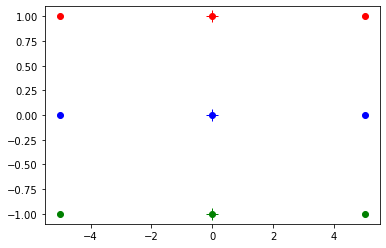

epoch 2
centroids_ 2 :
 [[ 0  1]
 [ 0  0]
 [ 0 -1]]


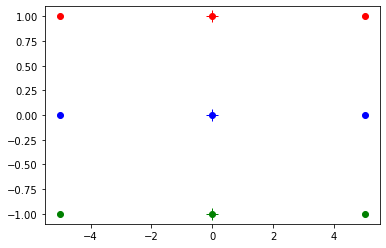

In [54]:
dataSet = [ [-5,1],[0,1], [5,1],
            [-5,0],[0,0], [5,0],
            [-5,-1],[0,-1],[5,-1]]
centroids=np.array([
    [0,1],
    [0,0],
    [0,-1]
])
dataSet = mat(dataSet)
centroids, cluster = kmeans(dataSet, k,centroids)

#### ANS FOR D,E,F as init cluster centroids
For the init centroids at D,E,F the resulat is not idea. Actualy for the k-means' propose, it is a minimum within-Cluster Variance algorithm. Hence, from the intuitive calculation, the best cluster centroids should be 
[
[-5,0],
[0,0],
[5,0]
]

<span style="color:blue"> Initialization is important for K-means. Consider the following heuristic method for selecting the initial cluster center positions: <br><br>
Choose the first center $c_1$ as the point A.<br>
For $k=2,...,K$, set $c_k = \underset{x\in X}{\arg\max}(\underset{i=1,...,k-1}{\min}\Vert x - c_i \Vert_2)$, where X is the set of data points.<br><br>
Apply this heuristic to the data points in Fig. 1. Show the computed cluster centers for K = 3. Next, run the K-means algorithm with the obtained cluster centers. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster.
</span>

This is a markdown cell. Replace this cell with your answer.

### Section 2 - Selecting the Number of Clusters (10 points)

<span style="color:blue"> Here, we will explore how to select the number of clusters. Using Python 3.6, load the attached data file 'assignment1.data' using the following commands:</span>
    
<span style="color:blue">import joblib<br>X = joblib.load('assignment1.data')</span>

<span style="color:blue">This results in X, which is a 400 by 2 matrix, where each row is a single sample, in 2 dimensions. Apply K-means on these samples with K ranging from 1 to 10. Plot a figure, where the y-axis is the Within Cluster Sum of Squares (WCSS) after convergence, and the x-axis is K from 1 to 10: </span>

<span style="color:blue">$WCSS = \sum_{k=1}^K \sum_{x \in C_i} \Vert x - c_i \Vert_2^2$</span>

<span style="color:blue">Select a value of K that you think is appropriate for clustering this dataset, and explain the reason. </span>

#### ANS for Elbow method
The method is called **Elbow method** for K-means optimization, which means find the turning point of the WCSS point and find the index_K as the best K setting.

In [311]:
X

array([[-7.89974146e+00,  6.10186662e+00],
       [-4.50351686e-01,  9.86593888e-01],
       [-8.66107299e+00,  5.46637644e+00],
       [-1.11271680e+00,  1.06159679e+00],
       [ 7.17196896e+00, -4.80656905e+00],
       [ 7.92220024e+00, -5.05961257e+00],
       [ 5.69166147e+00,  6.54414857e+00],
       [-5.63101724e-01,  4.77585985e-01],
       [ 3.07612560e+00,  8.30446331e+00],
       [ 7.82458722e+00, -5.68003479e+00],
       [ 8.38103105e+00, -5.31252932e+00],
       [ 6.15993797e+00, -4.82219188e+00],
       [-9.61274364e-01,  3.07167553e-01],
       [-7.73525025e+00,  5.08669037e+00],
       [ 5.80564749e+00, -4.92468325e+00],
       [ 6.36812570e+00, -4.96120496e+00],
       [-1.26150519e+00,  5.12918221e-01],
       [ 4.75340306e+00,  7.26663737e+00],
       [ 7.71871582e+00, -4.62866061e+00],
       [ 5.36102366e+00,  6.31461630e+00],
       [-9.49817641e+00,  5.44879873e+00],
       [ 7.20974465e+00, -4.90570698e+00],
       [-1.36917959e+00, -6.69042028e-01],
       [ 4.

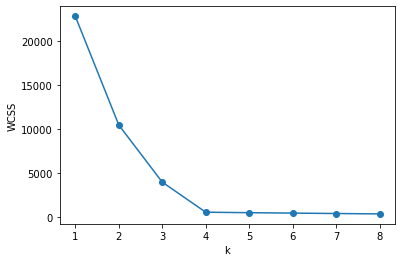

In [312]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
dataSet=X
WCSS = []  
for k in range(1,9):
    estimator = KMeans(n_clusters=k) 
    estimator.fit(dataSet)
    WCSS.append(estimator.inertia_) 
X_axis = range(1,9)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.plot(X_axis,WCSS,'o-')
plt.show()

The best K should be 4.
Reasons:

- With the increase of the number of clusters k, the sample division will be more refined, and the degree of aggregation of each cluster will gradually increase, so the square error and WCSS will naturally become smaller.
- When k is less than the number of true clusters, the increase of k will greatly increase the degree of aggregation of each cluster, so the decrease in WCSS will be large
- When k reaches the number of true clusters, increase the degree of aggregation obtained by k The return will become smaller quickly, so the decline of WCSS will decrease sharply, and then will gradually flatten as the value of k continues to increase, which means that the relationship between WCSS and k is the shape of an elbow, and this elbow K value is the number of true clusters of the data

### Section 3 - Data Cleaning and Exploration (20 points)

<span style="color:blue"> Please provide a description of each of the types of “dirty” records that you can find in the dataset, as well as the corresponding number of such records that are to be removed the dataset. Also, write down your code for removing those records. </span>

#### check duplicated

In [214]:
duplicated_index=record[record.duplicated()==True].index
print(record[record.duplicated()==True].index)
# record=record.drop_duplicates()

Int64Index([   517,    527,    537,    539,    555,    587,    589,    594,
               598,    600,
            ...
            539926, 540032, 540198, 541611, 541655, 541675, 541689, 541692,
            541699, 541701],
           dtype='int64', length=5268)


#### check validation of data

In [129]:
title=record.columns
print(title)
neg_Quantity=record[record["Quantity"]<0]
neg_Quantity

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')


InvoiceNo StockCode                          Description  Quantity  \
141      C536379         D                             Discount        -1   
154      C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239      C536391     21484          CHICK GREY HOT WATER BOTTLE       -12   
240      C536391     22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241      C536391     22553               PLASTERS IN TIN SKULLS       -24   
939      C536506     22960             JAM MAKING SET WITH JARS        -6   
1441     C536543     22632            HAND WARMER RED RETROSPOT        -1   
1442     C536543     22355            CHARLOTTE BAG SUKI DESIGN        -2   
1973     C536548     22244           3 HOOK HANGER MAGIC GARDEN        -4   
1974     C536548     22242        5 HOOK HANGER MAGIC TOADSTOOL        -5   
1975     C536548     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -1   
1976     C536548     22892    SET OF SALT AND PEPPER TOADSTOOLS        -7   
1977     C536548     22654                   DELUXE SEWING KIT         -1   
1978     C536548     22767          TRIPLE PHOTO FRAME CORNICE         -2   
1979     C536548     22333    RETROSPOT PARTY BAG + STICKER SET        -1   
1980     C536548     22245         HOOK, 1 HANGER ,MAGIC GARDEN        -2   
1981     C536548     22077               6 RIBBONS RUSTIC CHARM        -6   
1982     C536548     22631             CIRCUS PARADE LUNCH BOX         -1   
1983     C536548     22168        ORGANISER WOOD ANTIQUE WHITE         -2   
1984     C536548     21218               RED SPOTTY BISCUIT TIN        -3   
1985     C536548     20957         PORCELAIN HANGING BELL SMALL        -1   
1986     C536548     22580         ADVENT CALENDAR GINGHAM SACK        -4   
2406      536589     21777                                  NaN       -10   
3170     C536606     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -2   
3338     C536622     22752         SET 7 BABUSHKA NESTING BOXES        -2   
3410     C536625     22839      3 TIER CAKE TIN GREEN AND CREAM        -2   
...          ...       ...                                  ...       ...   
538565   C581409     22173   METAL 4 HOOK HANGER FRENCH CHATEAU        -2   
538566   C581409    85199L  LARGE HANGING IVORY & RED WOOD BIRD        -1   
538567   C581409     85127   SMALL SQUARE CUT GLASS CANDLESTICK        -5   
538919    581422     23169                              smashed      -235   
540072   C581460     22197                       POPCORN HOLDER        -5   
540073   C581460     22107                   PIZZA PLATE IN BOX        -1   
540078   C581462     16219         HOUSE SHAPE PENCIL SHARPENER       -48   
540079   C581462     21642            ASSORTED TUTTI FRUTTI PEN       -72   
540080   C581463     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -2   
540081   C581464     23458             DOLLY CABINET 3 DRAWERS         -1   
540082   C581464     71477   COLOURED GLASS STAR T-LIGHT HOLDER        -6   
540083   C581465     23660                   HENRIETTA HEN MUG         -2   
540084   C581465     22171     3 HOOK PHOTO SHELF ANTIQUE WHITE        -1   
540085   C581465     21876                        POTTERING MUG        -4   
540086   C581465     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -3   
540087   C581466     22838        3 TIER CAKE TIN RED AND CREAM        -1   
540088   C581466     22720    SET OF 3 CAKE TINS PANTRY DESIGN         -2   
540089   C581466     21216     SET 3 RETROSPOT TEA,COFFEE,SUGAR        -1   
540090   C581466     21535         RED RETROSPOT SMALL MILK JUG        -2   
540091   C581466     21232       STRAWBERRY CERAMIC TRINKET POT        -1   
540

In [118]:
neg_UnitPrice=record[record["UnitPrice"]<0]
neg_UnitPrice

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID  
299983  -11062.06         NaN  
299984  -11062.06         NaN

In [127]:
print(record.isnull().any())
null_customer=record[record['CustomerID'].isnull()]
null_customer

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
dtype: bool


InvoiceNo StockCode                          Description  Quantity  \
622       536414     22139                                  NaN        56   
1443      536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786                   POLKADOT RAIN HAT          4   
1446      536544     21787                RAIN PONCHO RETROSPOT         2   
1447      536544     21790                   VINTAGE SNAP CARDS         9   
1448      536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449      536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450      536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451      536544     21803       CHRISTMAS TREE STAR DECORATION        11   
1452      536544     21809     CHRISTMAS HANGING TREE WITH BELL         1   
1453      536544     21810     CHRISTMAS HANGING STAR WITH BELL         3   
1454      536544     21811    CHRISTMAS HANGING HEART WITH BELL         1   
1455      536544     21821     GLITTER STAR GARLAND WITH BELLS          1   
1456      536544     21822    GLITTER CHRISTMAS TREE WITH BELLS         1   
1457      536544     21823  PAINTED METAL HEART WITH HOLLY BELL         2   
1458      536544     21844                    RED RETROSPOT MUG         2   
1459      536544     21851       LILAC DIAMANTE PEN IN GIFT BOX         1   
1460      536544     21870     I CAN ONLY PLEASE ONE PERSON MUG         1   
1461      536544     21871                  SAVE THE PLANET MUG         5   
1462      536544     21874                    GIN AND TONIC MUG         1   
1463      536544     21879                     HEARTS GIFT TAPE         1   
1464      536544     21884            CAKES AND BOWS GIFT  TAPE         1   
1465      536544     21888                            BINGO SET         1   
1466      536544     21889               WOODEN BOX OF DOMINOES         2   
1467      536544     21892   TRADITIONAL WOODEN CATCH CUP GAME          3   
1468      536544     21894          POTTING SHED SEED ENVELOPES         1   
1469      536544     21911                   GARDEN METAL SIGN          1   
1470      536544     21912             VINTAGE SNAKES & LADDERS         3   
1471      536544     21913       VINTAGE SEASIDE JIGSAW PUZZLES         1   
...          ...       ...                                  ...       ...   
541511    581498     71053         WHITE MOROCCAN METAL LANTERN         1   
541512    581498    72349b      SET/6 PURPLE BUTTERFLY T-LIGHTS         2   
541513    581498     79321                        CHILLI LIGHTS        10   
541514    581498    82001s            SILVER RECORD COVER FRAME         2   
541515    581498     82482    WOODEN PICTURE FRAME WHITE FINISH         4   
541516    581498     82552                  WASHROOM METAL SIGN         1   
541517    581498     82580                  BATHROOM METAL SIGN         1   
541518    581498     82581                    TOILET METAL SIGN         1   
541519    581498     82600                N0 SINGING METAL SIGN         4   
541520    581498    84029E       RED WOOLLY HOTTIE WHITE HEART.         4   
541521    581498    84032A   CHARLIE+LOLA PINK HOT WATER BOTTLE         4   
541522    581498    84032B  CHARLIE + LOLA RED HOT WATER BOTTLE         3   
541523    581498     84375        SET OF 20 KIDS COOKIE CUTTERS         3   
541524    581498    84509a      SET OF 4 ENGLISH ROSE PLACEMATS         1   
541525    581498    84558a         3D DOG PICTURE PLAYING CARDS         1   
541526    581498     84832     ZINC WILLIE WINKIE  CANDLE STICK        26   
541527    581498    84968e      SET OF 16 VINTAGE BLACK CUTLERY         1   
541528    581498    84970s    HANGING HEART ZINC T-LIGHT HOLDER         1   
541529    581498    84997a    CHILDRENS CUTLERY POLKADOT GREEN          2   
541530    581498    84997b     CHILDRENS CUTLERY RETROSPOT RED          3   
541

#### check validation of data time

In [161]:
import datetime
def verify_date_str_lawyer(datetime_str):
    try:        
        datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')        
        return True    
    except ValueError:        
        return False 
def get_time(datetime_str):
    return datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

record[record['InvoiceDate'].map(verify_date_str_lawyer)==False]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID]
Index: []

#### drop invalid data
I think the empty customer ID should be defined as dirty, because it do not influent the general data mining unrelated to specific customer

In [215]:
neg_UnitPrice_set=neg_UnitPrice.index.to_list()
neg_Quantity_set=neg_Quantity.index.to_list()
duplicated_index_set=duplicated_index.to_list()
invalid_set=set(neg_UnitPrice_set)|set(neg_Quantity_set)|set(duplicated_index_set)
invalid_set=list(invalid_set)
invalid_set

[196611,
 229380,
 229381,
 229382,
 294923,
 294924,
 294925,
 491540,
 327718,
 229418,
 229419,
 229420,
 229421,
 229422,
 229423,
 458802,
 458803,
 32824,
 458824,
 458825,
 458829,
 524369,
 524370,
 360530,
 491604,
 360534,
 360535,
 360536,
 360537,
 360538,
 360539,
 360540,
 360541,
 360542,
 458840,
 491614,
 491619,
 32869,
 32870,
 393326,
 393328,
 163953,
 163954,
 163955,
 98420,
 393330,
 393332,
 393338,
 98427,
 98428,
 163964,
 163966,
 393344,
 229506,
 229507,
 229508,
 229509,
 229510,
 360581,
 393346,
 163971,
 163972,
 163973,
 393347,
 141,
 426119,
 262287,
 426126,
 154,
 229530,
 229531,
 491682,
 491683,
 360618,
 491691,
 524472,
 458936,
 491704,
 196807,
 295111,
 360657,
 360658,
 491731,
 491732,
 491733,
 393433,
 196831,
 196832,
 196833,
 196834,
 196835,
 524513,
 524514,
 327904,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 295150,
 295151,
 295152,
 295153,
 295154,
 295155,
 360687,
 458992,
 393466,
 393467,
 393468,
 393469,
 393470,
 393471

<span style="color:blue"> 1)~8) Please provide the answers to the questions listed in the table. </span>

In [216]:
clean_record=record.drop(index=invalid_set)

In [217]:
time_series=clean_record['InvoiceDate']
# a=datetime.datetime.strptime(time_series, '%Y-%m-%d %H:%M:%S')    
# clean_record.eval(time_s=datetime.datetime.strptime(InvoiceDate, '%Y-%m-%d %H:%M:%S'))
# clean_record.eval('time_s = datetime.datetime.strptime(InvoiceDate, '%Y-%m-%d %H:%M:%S')' , inplace=True)
clean_record['time'] = clean_record['InvoiceDate'].map(get_time)
clean_record

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
8         536366     22632            HAND WARMER RED POLKA DOT         6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10        536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11        536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12        536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13        536367     22310              IVORY KNITTED MUG COSY          6   
14        536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
15        536367     22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
16        536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
17        536367     21754             HOME BUILDING BLOCK WORD         3   
18        536367     21755             LOVE BUILDING BLOCK WORD         3   
19        536367     21777          RECIPE BOX WITH METAL HEART         4   
20        536367     48187                  DOORMAT NEW ENGLAND         4   
21        536368     22960             JAM MAKING SET WITH JARS         6   
22        536368     22913          RED COAT RACK PARIS FASHION         3   
23        536368     22912       YELLOW COAT RACK PARIS FASHION         3   
24        536368     22914         BLUE COAT RACK PARIS FASHION         3   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
26        536370     22728            ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727            ALARM CLOCK BAKELIKE RED         24   
28        536370     22726           ALARM CLOCK BAKELIKE GREEN        12   
29        536370     21724      PANDA AND BUNNIES STICKER SHEET        12   
...          ...       ...                                  ...       ...   
541879    581585     22726           ALARM CLOCK BAKELIKE GREEN         8   
541880    581585     22727            ALARM CLOCK BAKELIKE RED          4   
541881    581585     16016          LARGE CHINESE STYLE SCISSOR        10   
541882    581585     21916      SET 12 RETRO WHITE CHALK STICKS        24   
541883    581585     84692          BOX OF 24 COCKTAIL PARASOLS        25   
541884    581585     84946         ANTIQUE SILVER T-LIGHT GLASS        12   
541885    581585     21684     SMALL MEDINA STAMPED METAL BOWL         12   
541886    581585     22398           MAGNETS PACK OF 4 SWALLOWS        12   
541887    581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
541888    581585     23145       ZINC T-LIGHT HOLDER STAR LARGE        12   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   
541894    581587     22631             CIRCUS PARADE LUNCH BOX         12   
541895    581587     22556       PLASTERS IN TIN CIRCUS PARADE         12   
541896    581587     22555            PLASTERS IN TIN STRONGMAN        12   
541897    581587     22728            ALARM CLOCK BAKELIKE PINK         4   
541898    581587     22727            ALARM CLOCK BAKELIKE RED          4   
541

In [218]:
clean_record.sort_values(by='time')

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
8         536366     22632            HAND WARMER RED POLKA DOT         6   
24        536368     22914         BLUE COAT RACK PARIS FASHION         3   
23        536368     22912       YELLOW COAT RACK PARIS FASHION         3   
22        536368     22913          RED COAT RACK PARIS FASHION         3   
21        536368     22960             JAM MAKING SET WITH JARS         6   
20        536367     48187                  DOORMAT NEW ENGLAND         4   
19        536367     21777          RECIPE BOX WITH METAL HEART         4   
18        536367     21755             LOVE BUILDING BLOCK WORD         3   
17        536367     21754             HOME BUILDING BLOCK WORD         3   
15        536367     22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
14        536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
13        536367     22310              IVORY KNITTED MUG COSY          6   
12        536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
11        536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
10        536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
16        536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
37        536370     22631             CIRCUS PARADE LUNCH BOX         24   
38        536370     22661      CHARLOTTE BAG DOLLY GIRL DESIGN        20   
39        536370     21731        RED TOADSTOOL LED NIGHT LIGHT        24   
40        536370     22900      SET 2 TEA TOWELS I LOVE LONDON         24   
...          ...       ...                                  ...       ...   
541879    581585     22726           ALARM CLOCK BAKELIKE GREEN         8   
541877    581585     22113          GREY HEART HOT WATER BOTTLE         4   
541876    581585     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541875    581585     84879        ASSORTED COLOUR BIRD ORNAMENT        16   
541874    581585     23084                   RABBIT NIGHT LIGHT        12   
541873    581585     84832     ZINC WILLIE WINKIE  CANDLE STICK        24   
541872    581585     22460       EMBOSSED GLASS TEALIGHT HOLDER        12   
541871    581585     22178      VICTORIAN GLASS HANGING T-LIGHT        12   
541870    581585     22915        ASSORTED BOTTLE TOP  MAGNETS         24   
541869    581585     22481       BLACK TEA TOWEL CLASSIC DESIGN        12   
541878    581585     23356                LOVE HOT WATER BOTTLE         3   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   
541903    581587     23256          CHILDRENS CUTLERY SPACEBOY          4   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541902    581587     22629                  SPACEBOY LUNCH BOX         12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541

In [219]:
len(clean_record['CustomerID'].value_counts().index.to_list())

4339

If the transactions is defined as the InvoiceNo	and StockCode, then we can use unifine InvoiceNo,StockCode and timestamp as transactions_code
The result will be 520755 for ans 4

In [221]:
# clean_record['transactions']=clean_record['InvoiceNo'].str.cat(clean_record['StockCode']).str.cat(clean_record['InvoiceDate'].str)

In [222]:
# len(clean_record['transactions'].value_counts().index.to_list())

520755

In [282]:
clean_record=clean_record.rename(columns={"transactions":'transactions_StockCode_time'})

In [225]:
len(clean_record['StockCode'].value_counts().index.to_list())

3941

In [229]:
len(clean_record[clean_record['CustomerID']==17850]['InvoiceNo'])

297

In [236]:
Customer_list=clean_record['CustomerID'].value_counts().index.map(int).to_list()
cus_dict=dict()
for cus in Customer_list:
    cus_dict[cus]=len(clean_record[clean_record['CustomerID']==cus]['InvoiceNo'])

In [252]:
# cus_dict.sort
# list_t=[cus_dict.values()] 
# list_t.sort()
# print(list_t)
max(cus_dict, key=cus_dict.get)
cus_dict[17841]

7676

In [295]:
clean_record.groupby('StockCode').sum().sort_values(by='Quantity',ascending=False)

Quantity  UnitPrice  CustomerID
StockCode                                 
23843         80995       2.08     16446.0
23166         78033     367.12   3047321.0
22197         56898    1479.76  16366320.0
84077         54951     171.91   7213288.0
85099B        48375    5243.39  24700699.0
85123A        41645    7024.49  31482068.0
21212         36396    1029.15  15848883.0
84879         36362    2542.52  21247829.0
23084         31673    2426.97  12264242.0
22492         26633     298.31   4780324.0
22616         26323     234.44   6151604.0
21977         24820     655.33  10375355.0
22178         24275    1711.43  12412354.0
15036         23826     554.17   4863714.0
17003         23020      87.58   3252261.0
21915         22103     946.58   8473162.0
22386         21448    3201.64  13552302.0
23203         20585    2826.50  16759517.0
20725         19432    3371.91  19828936.0
22086         19329    3981.00  15514245.0
84946         19209    1396.17  10413193.0
47566         18287    9850.68  21379953.0
84991         18189     582.01  10260655.0
22355         18125    1082.78   8939464.0
22469         17971    2388.89  15132884.0
20724         17767    1196.63  11277120.0
85099F        17341    1943.84  10129839.0
84755         16401     452.53   8130758.0
22961         16396    2217.32  13176146.0
22693         16244     453.21   3633985.0
...             ...        ...         ...
84613C            1       4.65     18043.0
90181C            1       9.15         0.0
84661b            1       4.96         0.0
84661a            1       4.96         0.0
84968f            1      25.49         0.0
90142A            1       5.09         0.0
22016             1      83.33         0.0
90135A            1       4.98         0.0
21839             1       5.45     16931.0
85049c            1       2.46         0.0
85044             1       0.00         0.0
85036b            1       8.47         0.0
23643             1       3.33         0.0
85035c            1       8.47         0.0
90126A            1       3.36         0.0
20860             1       2.10         0.0
20849             1       0.00         0.0
82613a            1       2.46         0.0
84031a            1      16.63         0.0
84031b            1      16.63         0.0
85035b            1       8.47         0.0
85034b            1       8.29         0.0
35650             1       4.95     16904.0
84247C            1       0.00         0.0
35609A            1       2.51         0.0
35600A            1       0.00         0.0
85031B            1       4.95     14723.0
35597B            1       1.25     15048.0
35597A            1       1.25     15048.0
m                 1       2.55         0.0

[3941 rows x 3 columns]

This is a markdown cell. Please fill in your answer for (1)~(8).

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 1)  | Starting date of the dataset?                                                                              | 2010-12-01|
| 2)  | Ending date of the dataset?                                                                                | 2011-12-09|
| 3)  | Number of customers?                                                                                       | 4339 |
| 4)  | Number of transactions?                                                                                    |   20726   |
| 5)  | Number of different kind of items?                                                                         | 3941 |
| 6)  | Number of transactions customer ID 17850 has made?                                                         | 297 |
| 7)  | Which customer (ID) has made the most transactions?                                                        | 17841 |
| 8)  | What is the item ID of the best-seller? We define "best-seller" as the item with the highest sales volume. | 23843 |

<span style="color:blue"> 9) Next, let us get some general understanding about the transactions.  Please make a histogram of the number of unique items per transaction and describe one insight that you can observe from the plot, and explain why you find it interesting.  </span>

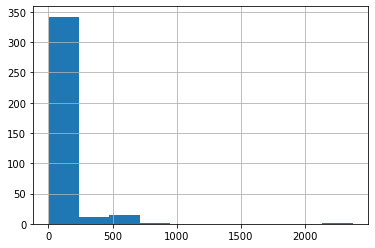

In [297]:
pd.value_counts(clean_record.groupby('InvoiceNo').count().sort_values(by='StockCode',ascending=False)['StockCode']).hist()

The item number distribution basically match the **long-tail/power-law** distribution. Most of the item number in one transaction is very little(near mean 56).

#### Section 4 - Mining Association Rules

In [319]:
print(clean_record.shape)
print(len(pd.value_counts(clean_record['StockCode'])))

(526052, 9)
3941


<span style="color:blue"> 1) Will we complete the counting before the sun burns out (the sun has another $ 5 \times 10^9 < 2^{33} $ years to burn)? </span>

In [325]:
import math
value = math.factorial(6)
a=math.factorial(3941)//2^36
a

4229401975731479796595521108014200615441893589182273686947595451272971197870553145031267731994365893897689587687197352247969132477411191352308220637881854618156882980492078591574954141567454720309496209972794074463243949092009199928330524907157274186527220809740698547558448854119347621014780721818394468963776551242734602266029923597925301460668984785145598796289691626808051845944457140804235485072922379743987969788374076566555620934182232120576380316606252925052302460091532217405683972094935755984327058063644764790808277012465213758225650921743305907997758060774363960511560689649030707317996634942882140221293818014999220667170494568764912846197522814452164018401847747343417631360511579717688676077847371891335080332252634452452242865798771400827757495343069426954108098241969969533627929216217359297975583179254786005073662360117810521432676562371861378125798519065971163312008843912101052335472805460771082568848290600541837758035490095372674968539473634143710586002315630134756844740123312

In [330]:
a//(5*10^9) # result is bigger than 1

7168477924968609824738171369515594263460836591834362181267110934360968131983988381408928359312484565928287436757961613979608699114256256529335967182850601047723530475410302697584668036555008000524569847411515380446176184901710508353102584588402159638181730186001183978912625176473470544092848681048126218582672120750397630959372751860890341458760991161263726773372358689505172620244842611532602517072749796176250796251481485706026476159630901899282000536620767669580173661172088504077430461177857213532757725531601296255607249173669853827501103257192043911860606882668413492392475745167848656471180737191325661392023420364405458757916092489432055671521225109240955963392962283632911239594087423250319789962453172697178102258055312631274987908133510848860605924310287164328996776681305033107843947824097219149111157930940315262836715864606458510902841631138748098518302574688086717477981091376442461585547127899612004353980153560240402979721169653174025370405887515497814552546297678194503126678175105

The result above is much bigger than 1, hence it can not be caulated before the sun burns out.

<span style="color:blue"> 2) Run efficient-apriori in python with min_support=0.5%, min_confidence=20%, max_length=4. Write down the rule with the highest lift (denoted as $r_1$). </span>

In [385]:
clean_record_group=dict(list(clean_record.groupby('InvoiceNo')))

In [395]:
all_packet=[]
for key, val in clean_record_group.items():
    all_packet.append(list(val['StockCode']))

In [396]:
all_packet

[['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730'],
 ['22633', '22632'],
 ['84879',
  '22745',
  '22748',
  '22749',
  '22310',
  '84969',
  '22623',
  '22622',
  '21754',
  '21755',
  '21777',
  '48187'],
 ['22960', '22913', '22912', '22914'],
 ['21756'],
 ['22728',
  '22727',
  '22726',
  '21724',
  '21883',
  '10002',
  '21791',
  '21035',
  '22326',
  '22629',
  '22659',
  '22631',
  '22661',
  '21731',
  '22900',
  '21913',
  '22540',
  '22544',
  '22492',
  'POST'],
 ['22086'],
 ['22632', '22633'],
 ['85123A',
  '71053',
  '84406B',
  '20679',
  '37370',
  '21871',
  '21071',
  '21068',
  '82483',
  '82486',
  '82482',
  '82494L',
  '84029G',
  '84029E',
  '22752',
  '21730'],
 ['21258'],
 ['85123A',
  '71053',
  '84406B',
  '20679',
  '37370',
  '21871',
  '21071',
  '21068',
  '82483',
  '82486',
  '82482',
  '82494L',
  '84029G',
  '84029E',
  '22752',
  '21730'],
 ['22114', '21733'],
 ['22632', '22633'],
 ['22386',
  '85099C',
  '21033',
  '20723',
  '84997B

In [412]:
from efficient_apriori import apriori
from time import time

In [413]:
data=all_packet
begin = time()
itemsets2, rules2 = apriori(data, min_support=0.005,  min_confidence=0.2,max_length=4)
print(itemsets2)
print(rules2)
end = time()
print(end - begin)

1969.287752866745


In [439]:
print(len(rules2))
print(len(itemsets2[1]),len(itemsets2[2]),len(itemsets2[3]),len(itemsets2[4]))

45151
1490 7259 5233 2003


In [430]:
for rule in sorted(rules2, key=lambda rule: rule.lift,reverse=True):
  print(rule) 

{23290, 23291} -> {23289, 23292} (conf: 0.877, supp: 0.005, lift: 148.998, conv: 8.085)
{23289, 23292} -> {23290, 23291} (conf: 0.877, supp: 0.005, lift: 148.998, conv: 8.085)
{23172, 23174} -> {23171, 23175} (conf: 0.783, supp: 0.005, lift: 112.729, conv: 4.581)
{23171, 23175} -> {23172, 23174} (conf: 0.778, supp: 0.005, lift: 112.729, conv: 4.469)
{23291, 23292} -> {23289, 23290} (conf: 0.764, supp: 0.005, lift: 112.345, conv: 4.214)
{23289, 23290} -> {23291, 23292} (conf: 0.759, supp: 0.005, lift: 112.345, conv: 4.119)
{20677, 21240} -> {20675, 21239} (conf: 0.733, supp: 0.005, lift: 107.728, conv: 3.718)
{20675, 21239} -> {20677, 21240} (conf: 0.759, supp: 0.005, lift: 107.728, conv: 4.118)
{23290, 23291, 23292} -> {23289} (conf: 0.982, supp: 0.005, lift: 106.522, conv: 53.998)
{23289} -> {23290, 23291, 23292} (conf: 0.560, supp: 0.005, lift: 106.522, conv: 2.262)
{23172, 23173} -> {23171, 23174} (conf: 0.850, supp: 0.005, lift: 106.080, conv: 6.597)
{23171, 23174} -> {23172, 23173

{21935, DOT} -> {21993, 84032A} (conf: 0.310, supp: 0.005, lift: 48.600, conv: 1.439)
{21718} -> {21716} (conf: 0.572, supp: 0.006, lift: 48.592, conv: 2.309)
{21716} -> {21718} (conf: 0.537, supp: 0.006, lift: 48.592, conv: 2.135)
{22699, DOT} -> {22697, 82580} (conf: 0.380, supp: 0.005, lift: 48.590, conv: 1.600)
{22697, 82580} -> {22699, DOT} (conf: 0.673, supp: 0.005, lift: 48.590, conv: 3.014)
{22698, 23172} -> {23171} (conf: 0.893, supp: 0.008, lift: 48.581, conv: 9.178)
{23171} -> {22698, 23172} (conf: 0.438, supp: 0.008, lift: 48.581, conv: 1.764)
{23266} -> {23265} (conf: 0.687, supp: 0.011, lift: 48.563, conv: 3.145)
{23265} -> {23266} (conf: 0.747, supp: 0.011, lift: 48.563, conv: 3.899)
{22356, 22726} -> {21212, 22355} (conf: 0.640, supp: 0.005, lift: 48.553, conv: 2.738)
{21212, 22355} -> {22356, 22726} (conf: 0.403, supp: 0.005, lift: 48.553, conv: 1.661)
{22355, 84692} -> {20719, 22423} (conf: 0.609, supp: 0.005, lift: 48.522, conv: 2.523)
{20719, 22423} -> {22355, 84692

{21238} -> {20675, 21240} (conf: 0.310, supp: 0.006, lift: 38.254, conv: 1.438)
{22356, 85099B} -> {20724, 22386} (conf: 0.443, supp: 0.006, lift: 38.244, conv: 1.774)
{20724, 22386} -> {22356, 85099B} (conf: 0.517, supp: 0.006, lift: 38.244, conv: 2.041)
{84596L} -> {84596F} (conf: 0.802, supp: 0.007, lift: 38.228, conv: 4.953)
{84596F} -> {84596L} (conf: 0.317, supp: 0.007, lift: 38.228, conv: 1.452)
{21990, 22197, DOT} -> {21993} (conf: 0.784, supp: 0.005, lift: 38.213, conv: 4.526)
{21993} -> {21990, 22197, DOT} (conf: 0.247, supp: 0.005, lift: 38.213, conv: 1.320)
{20723, 23204} -> {20719, 23206} (conf: 0.415, supp: 0.005, lift: 38.203, conv: 1.690)
{20719, 23206} -> {20723, 23204} (conf: 0.476, supp: 0.005, lift: 38.203, conv: 1.883)
{22697, 22699, 23173} -> {23175} (conf: 0.608, supp: 0.005, lift: 38.198, conv: 2.512)
{23175} -> {22697, 22699, 23173} (conf: 0.315, supp: 0.005, lift: 38.198, conv: 1.448)
{22697, DOT} -> {21731, 22960} (conf: 0.335, supp: 0.005, lift: 38.189, conv

{22386, DOT} -> {21731, 22411} (conf: 0.336, supp: 0.006, lift: 33.343, conv: 1.491)
{21731, 22411} -> {22386, DOT} (conf: 0.555, supp: 0.006, lift: 33.343, conv: 2.210)
{22197, 22961, DOT} -> {21934} (conf: 0.661, supp: 0.005, lift: 33.324, conv: 2.890)
{21934} -> {22197, 22961, DOT} (conf: 0.275, supp: 0.005, lift: 33.324, conv: 1.368)
{20723, 22356} -> {20719, 23205} (conf: 0.346, supp: 0.006, lift: 33.320, conv: 1.512)
{20719, 23205} -> {20723, 22356} (conf: 0.609, supp: 0.006, lift: 33.320, conv: 2.513)
{20725, 21933} -> {21932} (conf: 0.717, supp: 0.006, lift: 33.313, conv: 3.456)
{21932} -> {20725, 21933} (conf: 0.267, supp: 0.006, lift: 33.313, conv: 1.353)
{21993, 22961} -> {21992} (conf: 0.702, supp: 0.006, lift: 33.312, conv: 3.289)
{21992} -> {21993, 22961} (conf: 0.270, supp: 0.006, lift: 33.312, conv: 1.359)
{20723, 21154} -> {20719, 22355} (conf: 0.733, supp: 0.005, lift: 33.311, conv: 3.661)
{20719, 22355} -> {20723, 21154} (conf: 0.235, supp: 0.005, lift: 33.311, conv:

{20719, 20724} -> {22355, 22727} (conf: 0.231, supp: 0.006, lift: 29.766, conv: 1.291)
{21212, 22356} -> {20724, 20728} (conf: 0.438, supp: 0.005, lift: 29.763, conv: 1.753)
{20724, 20728} -> {21212, 22356} (conf: 0.370, supp: 0.005, lift: 29.763, conv: 1.569)
{20723, 22356, 23204} -> {23205} (conf: 0.671, supp: 0.006, lift: 29.761, conv: 2.967)
{23205} -> {20723, 22356, 23204} (conf: 0.244, supp: 0.006, lift: 29.761, conv: 1.312)
{22961, 85099B, DOT} -> {21935} (conf: 0.761, supp: 0.008, lift: 29.758, conv: 4.077)
{21935} -> {22961, 85099B, DOT} (conf: 0.294, supp: 0.008, lift: 29.758, conv: 1.403)
{23294, 23296} -> {23293} (conf: 0.792, supp: 0.008, lift: 29.747, conv: 4.686)
{23293} -> {23294, 23296} (conf: 0.297, supp: 0.008, lift: 29.747, conv: 1.408)
{22697, DOT} -> {22457, 22961} (conf: 0.341, supp: 0.005, lift: 29.730, conv: 1.501)
{22457, 22961} -> {22697, DOT} (conf: 0.475, supp: 0.005, lift: 29.730, conv: 1.874)
{85099B, DOT} -> {22196, 22379} (conf: 0.216, supp: 0.005, lift

{20719, 85099B, DOT} -> {21935} (conf: 0.705, supp: 0.005, lift: 27.575, conv: 3.305)
{21935} -> {20719, 85099B, DOT} (conf: 0.208, supp: 0.005, lift: 27.575, conv: 1.252)
{22355, 23204, 23206} -> {23205} (conf: 0.621, supp: 0.005, lift: 27.574, conv: 2.581)
{23205} -> {22355, 23204, 23206} (conf: 0.225, supp: 0.005, lift: 27.574, conv: 1.280)
{85099B, DOT} -> {21731, 21931} (conf: 0.289, supp: 0.007, lift: 27.570, conv: 1.391)
{21731, 21931} -> {85099B, DOT} (conf: 0.645, supp: 0.007, lift: 27.570, conv: 2.752)
{21992, 22356} -> {DOT} (conf: 0.943, supp: 0.006, lift: 27.569, conv: 16.970)
{21731, 22197, 85099B} -> {DOT} (conf: 0.943, supp: 0.006, lift: 27.569, conv: 16.970)
{23199, DOT} -> {84032A} (conf: 0.416, supp: 0.005, lift: 27.569, conv: 1.687)
{84032A} -> {23199, DOT} (conf: 0.342, supp: 0.005, lift: 27.569, conv: 1.501)
{85099B, DOT} -> {21931, 22697} (conf: 0.266, supp: 0.006, lift: 27.563, conv: 1.349)
{21931, 22697} -> {85099B, DOT} (conf: 0.645, supp: 0.006, lift: 27.563,

{20719, 22355} -> {20724, 22423} (conf: 0.316, supp: 0.007, lift: 25.467, conv: 1.443)
{22386, DOT} -> {20712, 21928} (conf: 0.339, supp: 0.006, lift: 25.467, conv: 1.493)
{20712, 21928} -> {22386, DOT} (conf: 0.424, supp: 0.006, lift: 25.467, conv: 1.707)
{22697, 23175} -> {22698, 22699} (conf: 0.736, supp: 0.006, lift: 25.461, conv: 3.676)
{22697, 23199} -> {DOT} (conf: 0.871, supp: 0.007, lift: 25.461, conv: 7.485)
{22355, 22666} -> {21934} (conf: 0.505, supp: 0.005, lift: 25.459, conv: 1.980)
{21934} -> {22355, 22666} (conf: 0.253, supp: 0.005, lift: 25.459, conv: 1.325)
{20724, 22355} -> {20723, 20727} (conf: 0.345, supp: 0.008, lift: 25.459, conv: 1.506)
{20723, 20727} -> {20724, 22355} (conf: 0.623, supp: 0.008, lift: 25.459, conv: 2.586)
{22197, 22356} -> {20724, 22355} (conf: 0.623, supp: 0.007, lift: 25.457, conv: 2.586)
{20724, 22355} -> {22197, 22356} (conf: 0.270, supp: 0.007, lift: 25.457, conv: 1.356)
{21935, 22386} -> {DOT} (conf: 0.870, supp: 0.008, lift: 25.440, conv:

{20724, 20727} -> {22355, 22356} (conf: 0.463, supp: 0.008, lift: 23.409, conv: 1.826)
{20719, 22356, 84692} -> {20723} (conf: 0.815, supp: 0.005, lift: 23.407, conv: 5.228)
{22697, DOT} -> {21494} (conf: 0.353, supp: 0.006, lift: 23.406, conv: 1.523)
{21494} -> {22697, DOT} (conf: 0.374, supp: 0.006, lift: 23.406, conv: 1.571)
{20723, 22661} -> {20719, 20724} (conf: 0.571, supp: 0.005, lift: 23.406, conv: 2.276)
{20719, 20724} -> {20723, 22661} (conf: 0.213, supp: 0.005, lift: 23.406, conv: 1.260)
{20725, 22356} -> {20723, 22355} (conf: 0.469, supp: 0.007, lift: 23.405, conv: 1.844)
{20723, 22355} -> {20725, 22356} (conf: 0.342, supp: 0.007, lift: 23.405, conv: 1.498)
{22457, 85099B} -> {21935, DOT} (conf: 0.379, supp: 0.006, lift: 23.398, conv: 1.585)
{21935, DOT} -> {22457, 85099B} (conf: 0.360, supp: 0.006, lift: 23.398, conv: 1.539)
{20724, 22355, 22423} -> {20723} (conf: 0.815, supp: 0.007, lift: 23.397, conv: 5.218)
{20719, 20724, 21154} -> {22356} (conf: 0.839, supp: 0.005, lif

{20725, 23207} -> {20726, 23206} (conf: 0.384, supp: 0.006, lift: 21.561, conv: 1.594)
{20723, 22355, 84692} -> {20719} (conf: 0.869, supp: 0.006, lift: 21.560, conv: 7.304)
{22698, 22960} -> {22697, 22699} (conf: 0.799, supp: 0.007, lift: 21.559, conv: 4.788)
{22697, DOT} -> {21990} (conf: 0.381, supp: 0.006, lift: 21.556, conv: 1.586)
{21990} -> {22697, DOT} (conf: 0.344, supp: 0.006, lift: 21.556, conv: 1.501)
{22422} -> {21935} (conf: 0.551, supp: 0.005, lift: 21.556, conv: 2.171)
{21935} -> {22422} (conf: 0.213, supp: 0.005, lift: 21.556, conv: 1.258)
{20712, 22197} -> {DOT} (conf: 0.737, supp: 0.008, lift: 21.554, conv: 3.677)
{DOT} -> {20712, 22197} (conf: 0.226, supp: 0.008, lift: 21.554, conv: 1.278)
{20717, 85099B} -> {20718} (conf: 0.598, supp: 0.006, lift: 21.553, conv: 2.418)
{20718} -> {20717, 85099B} (conf: 0.202, supp: 0.006, lift: 21.553, conv: 1.241)
{20723, 20724, 22727} -> {20719} (conf: 0.868, supp: 0.005, lift: 21.550, conv: 7.283)
{21929, 21931} -> {20712, 21928}

{DOT} -> {21731, 22197} (conf: 0.220, supp: 0.008, lift: 19.914, conv: 1.268)
{47566, DOT} -> {15036} (conf: 0.498, supp: 0.005, lift: 19.914, conv: 1.941)
{15036} -> {47566, DOT} (conf: 0.208, supp: 0.005, lift: 19.914, conv: 1.250)
{20724, 22356, 22423} -> {20719} (conf: 0.802, supp: 0.007, lift: 19.913, conv: 4.853)
{20724, 20725, 22382} -> {20723} (conf: 0.694, supp: 0.006, lift: 19.912, conv: 3.150)
{21212, 22726} -> {20719, 20724} (conf: 0.486, supp: 0.005, lift: 19.911, conv: 1.898)
{20719, 20724} -> {21212, 22726} (conf: 0.208, supp: 0.005, lift: 19.911, conv: 1.249)
{22385, 22386} -> {20712, 22411} (conf: 0.375, supp: 0.006, lift: 19.909, conv: 1.569)
{20712, 22411} -> {22385, 22386} (conf: 0.326, supp: 0.006, lift: 19.909, conv: 1.459)
{21931, DOT} -> {20712, 20713} (conf: 0.271, supp: 0.005, lift: 19.909, conv: 1.353)
{20712, 20713} -> {21931, DOT} (conf: 0.379, supp: 0.005, lift: 19.909, conv: 1.581)
{22554, 22556} -> {22555} (conf: 0.495, supp: 0.007, lift: 19.909, conv: 1

{20728, 22355, 22382} -> {20719} (conf: 0.752, supp: 0.006, lift: 18.657, conv: 3.864)
{20719, 20726, 22383} -> {22356} (conf: 0.669, supp: 0.005, lift: 18.656, conv: 2.911)
{22699, 22960} -> {22697, 22698} (conf: 0.570, supp: 0.007, lift: 18.654, conv: 2.253)
{22697, 22698} -> {22699, 22960} (conf: 0.226, supp: 0.007, lift: 18.654, conv: 1.276)
{20724, 21154} -> {20719} (conf: 0.752, supp: 0.006, lift: 18.654, conv: 3.862)
{20724, 22423} -> {20723} (conf: 0.650, supp: 0.008, lift: 18.654, conv: 2.756)
{20723} -> {20724, 22423} (conf: 0.231, supp: 0.008, lift: 18.654, conv: 1.285)
{20711, 21931, DOT} -> {20712} (conf: 0.777, supp: 0.007, lift: 18.652, conv: 4.291)
{21232, 22355} -> {20723} (conf: 0.650, supp: 0.006, lift: 18.652, conv: 2.756)
{21773} -> {DOT} (conf: 0.638, supp: 0.005, lift: 18.652, conv: 2.668)
{20724, 20725, 20726} -> {22356} (conf: 0.669, supp: 0.006, lift: 18.651, conv: 2.909)
{21929, 22386} -> {20712, 22411} (conf: 0.351, supp: 0.006, lift: 18.649, conv: 1.512)
{2

{22356, 23204} -> {20719} (conf: 0.707, supp: 0.008, lift: 17.545, conv: 3.274)
{20719} -> {22356, 23204} (conf: 0.211, supp: 0.008, lift: 17.545, conv: 1.252)
{22697, 22698, 23171} -> {22699} (conf: 0.902, supp: 0.008, lift: 17.541, conv: 9.696)
{20724, 22355, 22383} -> {20719} (conf: 0.707, supp: 0.008, lift: 17.541, conv: 3.272)
{21166, 21175, 21181} -> {85152} (conf: 0.574, supp: 0.005, lift: 17.540, conv: 2.269)
{22178, 22469} -> {DOT} (conf: 0.600, supp: 0.006, lift: 17.540, conv: 2.414)
{20712, 23199, 85099B} -> {DOT} (conf: 0.600, supp: 0.007, lift: 17.540, conv: 2.414)
{22383, 22384} -> {20727, 23207} (conf: 0.256, supp: 0.006, lift: 17.539, conv: 1.325)
{20727, 23207} -> {22383, 22384} (conf: 0.396, supp: 0.006, lift: 17.539, conv: 1.618)
{20719, 20723, 21154} -> {20724} (conf: 0.875, supp: 0.005, lift: 17.539, conv: 7.601)
{20719, 20723, 21232} -> {20724} (conf: 0.875, supp: 0.005, lift: 17.539, conv: 7.601)
{21212, 22355, 22382} -> {20724} (conf: 0.875, supp: 0.005, lift: 1

{20712, DOT} -> {21218} (conf: 0.313, supp: 0.005, lift: 16.466, conv: 1.428)
{21218} -> {20712, DOT} (conf: 0.287, supp: 0.005, lift: 16.466, conv: 1.378)
{22384, 23208} -> {20725, 22383} (conf: 0.520, supp: 0.006, lift: 16.466, conv: 2.019)
{22666, 22961, DOT} -> {21731} (conf: 0.674, supp: 0.006, lift: 16.464, conv: 2.946)
{22411, 85099B} -> {20712, DOT} (conf: 0.287, supp: 0.009, lift: 16.464, conv: 1.378)
{20712, DOT} -> {22411, 85099B} (conf: 0.540, supp: 0.009, lift: 16.464, conv: 2.103)
{21931, 85099C} -> {20712, DOT} (conf: 0.287, supp: 0.006, lift: 16.462, conv: 1.378)
{20712, DOT} -> {21931, 85099C} (conf: 0.335, supp: 0.006, lift: 16.462, conv: 1.474)
{22411, 23199} -> {21929, 85099B} (conf: 0.411, supp: 0.007, lift: 16.461, conv: 1.657)
{21929, 85099B} -> {22411, 23199} (conf: 0.264, supp: 0.007, lift: 16.461, conv: 1.338)
{21931, 22386, 22411} -> {DOT} (conf: 0.563, supp: 0.008, lift: 16.461, conv: 2.211)
{DOT} -> {21931, 22386, 22411} (conf: 0.245, supp: 0.008, lift: 16.

{20724} -> {20723, 20728} (conf: 0.201, supp: 0.010, lift: 15.615, conv: 1.236)
{21931, 85099B} -> {20712, 22386} (conf: 0.323, supp: 0.011, lift: 15.615, conv: 1.447)
{20712, 22386} -> {21931, 85099B} (conf: 0.545, supp: 0.011, lift: 15.615, conv: 2.123)
{20713, 21930} -> {21931, 85099B} (conf: 0.545, supp: 0.005, lift: 15.615, conv: 2.123)
{23199, 23203, 85099B} -> {23202} (conf: 0.663, supp: 0.008, lift: 15.612, conv: 2.840)
{22355, 22384} -> {20725, 22383} (conf: 0.493, supp: 0.005, lift: 15.612, conv: 1.912)
{23265} -> {22578} (conf: 0.386, supp: 0.005, lift: 15.612, conv: 1.588)
{22578} -> {23265} (conf: 0.221, supp: 0.005, lift: 15.612, conv: 1.265)
{22086, 22867} -> {22910} (conf: 0.618, supp: 0.005, lift: 15.611, conv: 2.512)
{21928, DOT} -> {20712} (conf: 0.650, supp: 0.008, lift: 15.611, conv: 2.738)
{20728, 22384, 23206} -> {23207} (conf: 0.557, supp: 0.005, lift: 15.609, conv: 2.178)
{22423, 22699, 23170} -> {22697} (conf: 0.764, supp: 0.006, lift: 15.607, conv: 4.035)
{21

{20723} -> {20719, 85099B} (conf: 0.213, supp: 0.007, lift: 14.736, conv: 1.253)
{22382, 22383} -> {20719, 20727} (conf: 0.203, supp: 0.005, lift: 14.736, conv: 1.237)
{20719, 20727} -> {22382, 22383} (conf: 0.379, supp: 0.005, lift: 14.736, conv: 1.569)
{20723, 23203} -> {20724} (conf: 0.735, supp: 0.005, lift: 14.735, conv: 3.587)
{22382, 22384} -> {20728, 22383} (conf: 0.383, supp: 0.008, lift: 14.734, conv: 1.579)
{20728, 22383} -> {22382, 22384} (conf: 0.304, supp: 0.008, lift: 14.734, conv: 1.408)
{22699, 23173} -> {22697} (conf: 0.722, supp: 0.008, lift: 14.733, conv: 3.415)
{22383, 22384} -> {20725, 23206} (conf: 0.346, supp: 0.008, lift: 14.732, conv: 1.493)
{20725, 23206} -> {22383, 22384} (conf: 0.333, supp: 0.008, lift: 14.732, conv: 1.465)
{22383, 22662} -> {20725, 23206} (conf: 0.346, supp: 0.006, lift: 14.732, conv: 1.493)
{20725, 23206} -> {22383, 22662} (conf: 0.240, supp: 0.006, lift: 14.732, conv: 1.295)
{21929, 22385} -> {21931, 85099B} (conf: 0.515, supp: 0.005, li

{21930, 85099B} -> {21928, 21929} (conf: 0.266, supp: 0.005, lift: 13.802, conv: 1.336)
{21928, 21929} -> {21930, 85099B} (conf: 0.276, supp: 0.005, lift: 13.802, conv: 1.353)
{21928, 21931, 85099B} -> {21929} (conf: 0.576, supp: 0.008, lift: 13.801, conv: 2.260)
{23204, 23206} -> {20719} (conf: 0.556, supp: 0.008, lift: 13.799, conv: 2.161)
{20713, 21929} -> {20712} (conf: 0.575, supp: 0.005, lift: 13.799, conv: 2.253)
{22502, DOT} -> {20712} (conf: 0.575, supp: 0.006, lift: 13.799, conv: 2.253)
{20725, 20726, 23208} -> {22382} (conf: 0.770, supp: 0.006, lift: 13.798, conv: 4.110)
{22086, DOT} -> {22961} (conf: 0.774, supp: 0.006, lift: 13.798, conv: 4.169)
{20728, 22383} -> {20725, 20727} (conf: 0.427, supp: 0.011, lift: 13.797, conv: 1.690)
{20725, 20727} -> {20728, 22383} (conf: 0.359, supp: 0.011, lift: 13.797, conv: 1.519)
{22219, DOT} -> {22379} (conf: 0.498, supp: 0.006, lift: 13.795, conv: 1.920)
{20724, 22197} -> {DOT} (conf: 0.472, supp: 0.006, lift: 13.795, conv: 1.829)
{82

{23203, 23206} -> {20725, 85099B} (conf: 0.357, supp: 0.005, lift: 12.793, conv: 1.513)
{22382, 23206, 23207} -> {20726} (conf: 0.628, supp: 0.006, lift: 12.791, conv: 2.558)
{23199, 23200, 23202} -> {23203} (conf: 0.760, supp: 0.009, lift: 12.791, conv: 3.924)
{21731, 22960} -> {22697} (conf: 0.626, supp: 0.006, lift: 12.790, conv: 2.545)
{20719, 20723, 22382} -> {20728} (conf: 0.710, supp: 0.005, lift: 12.790, conv: 3.253)
{23199, 23200, 85099F} -> {23203} (conf: 0.760, supp: 0.005, lift: 12.790, conv: 3.923)
{20712, 22385, 22386} -> {21931} (conf: 0.731, supp: 0.007, lift: 12.789, conv: 3.500)
{21993, 22697} -> {22961} (conf: 0.717, supp: 0.006, lift: 12.788, conv: 3.335)
{22383, 23206} -> {23207} (conf: 0.457, supp: 0.010, lift: 12.788, conv: 1.774)
{23207} -> {22383, 23206} (conf: 0.277, supp: 0.010, lift: 12.788, conv: 1.353)
{22355, DOT} -> {21731} (conf: 0.524, supp: 0.005, lift: 12.787, conv: 2.014)
{22697, DOT} -> {21931, 22411} (conf: 0.323, supp: 0.005, lift: 12.786, conv: 

{21929, 22411} -> {85099B, 85099C} (conf: 0.341, supp: 0.007, lift: 12.065, conv: 1.474)
{21931, 23202} -> {23199} (conf: 0.569, supp: 0.007, lift: 12.064, conv: 2.212)
{22077, 22960} -> {22961} (conf: 0.676, supp: 0.007, lift: 12.063, conv: 2.916)
{20727, 20728} -> {20719, 22356} (conf: 0.230, supp: 0.006, lift: 12.062, conv: 1.274)
{20719, 22356} -> {20727, 20728} (conf: 0.304, supp: 0.006, lift: 12.062, conv: 1.400)
{23206, 23209} -> {20725, 20726} (conf: 0.306, supp: 0.007, lift: 12.062, conv: 1.405)
{20725, 20726} -> {23206, 23209} (conf: 0.257, supp: 0.007, lift: 12.062, conv: 1.317)
{21212, 47566} -> {22356} (conf: 0.432, supp: 0.006, lift: 12.060, conv: 1.698)
{21212, 22960} -> {21977} (conf: 0.506, supp: 0.006, lift: 12.060, conv: 1.938)
{23204, 23206} -> {20725, 22383} (conf: 0.381, supp: 0.005, lift: 12.060, conv: 1.565)
{82580, 85099B} -> {20712} (conf: 0.502, supp: 0.006, lift: 12.060, conv: 1.925)
{20725, 22382, 23209} -> {22384} (conf: 0.634, supp: 0.006, lift: 12.058, c

{22720, DOT} -> {22722} (conf: 0.460, supp: 0.005, lift: 11.407, conv: 1.776)
{20719, 20726, 22383} -> {20727} (conf: 0.701, supp: 0.005, lift: 11.407, conv: 3.135)
{21731, 85099B, DOT} -> {22630} (conf: 0.468, supp: 0.005, lift: 11.407, conv: 1.802)
{22411, 22663} -> {22386} (conf: 0.670, supp: 0.006, lift: 11.407, conv: 2.855)
{21232, 85099B} -> {21731} (conf: 0.467, supp: 0.005, lift: 11.407, conv: 1.800)
{84032A, DOT} -> {22077} (conf: 0.526, supp: 0.005, lift: 11.406, conv: 2.011)
{22697, 22961} -> {22960} (conf: 0.624, supp: 0.008, lift: 11.406, conv: 2.511)
{20723, 22355, 22383} -> {20726} (conf: 0.560, supp: 0.005, lift: 11.406, conv: 2.162)
{22379, 22386} -> {21930} (conf: 0.388, supp: 0.006, lift: 11.405, conv: 1.578)
{21935, DOT} -> {22697, 22699} (conf: 0.423, supp: 0.007, lift: 11.405, conv: 1.668)
{22383, 22384, 23206} -> {20727} (conf: 0.700, supp: 0.007, lift: 11.405, conv: 3.134)
{22386, DOT} -> {21928} (conf: 0.443, supp: 0.007, lift: 11.404, conv: 1.727)
{20725, 2320

{20728, 22383, 23206} -> {22384} (conf: 0.562, supp: 0.007, lift: 10.686, conv: 2.163)
{22379, 22411} -> {22386} (conf: 0.628, supp: 0.008, lift: 10.685, conv: 2.530)
{20725, 22355, 23204} -> {20727} (conf: 0.656, supp: 0.005, lift: 10.685, conv: 2.730)
{21992, DOT} -> {21790} (conf: 0.477, supp: 0.006, lift: 10.685, conv: 1.828)
{21213, 22197} -> {21212} (conf: 0.680, supp: 0.006, lift: 10.684, conv: 2.930)
{20712, 22386, 85099B} -> {85099C} (conf: 0.481, supp: 0.008, lift: 10.684, conv: 1.840)
{20724, 22356, 22382} -> {22384} (conf: 0.562, supp: 0.005, lift: 10.684, conv: 2.162)
{23208, 23209} -> {20725, 20727} (conf: 0.330, supp: 0.005, lift: 10.683, conv: 1.447)
{22379, 22961} -> {22666} (conf: 0.576, supp: 0.006, lift: 10.683, conv: 2.230)
{22382, 22383} -> {20723, 22355} (conf: 0.214, supp: 0.006, lift: 10.682, conv: 1.247)
{20723, 22355} -> {22382, 22383} (conf: 0.275, supp: 0.006, lift: 10.682, conv: 1.343)
{20725, 20728, 22384} -> {22382} (conf: 0.596, supp: 0.009, lift: 10.68

{21929, 21930} -> {23199} (conf: 0.470, supp: 0.006, lift: 9.958, conv: 1.797)
{20724, 22383} -> {20726} (conf: 0.489, supp: 0.008, lift: 9.958, conv: 1.861)
{22457, 22961, DOT} -> {22197} (conf: 0.669, supp: 0.005, lift: 9.957, conv: 2.816)
{22197, 22961} -> {21790} (conf: 0.445, supp: 0.006, lift: 9.957, conv: 1.721)
{21977, 84992} -> {21212} (conf: 0.634, supp: 0.008, lift: 9.957, conv: 2.559)
{20726, 20727} -> {20723} (conf: 0.347, supp: 0.007, lift: 9.957, conv: 1.478)
{20723} -> {20726, 20727} (conf: 0.213, supp: 0.007, lift: 9.957, conv: 1.244)
{21934, 85099B, DOT} -> {22197} (conf: 0.669, supp: 0.005, lift: 9.957, conv: 2.816)
{21993, DOT} -> {22457} (conf: 0.600, supp: 0.007, lift: 9.956, conv: 2.349)
{21216, DOT} -> {22386} (conf: 0.585, supp: 0.005, lift: 9.956, conv: 2.269)
{20719, 20725, 22355} -> {23206} (conf: 0.498, supp: 0.005, lift: 9.956, conv: 1.891)
{20727, 22411} -> {21931} (conf: 0.569, supp: 0.006, lift: 9.955, conv: 2.186)
{21080, 21094} -> {22090} (conf: 0.384

{23199, 85099B} -> {23203, 23209} (conf: 0.227, supp: 0.006, lift: 9.339, conv: 1.262)
{21931, 22385} -> {23199} (conf: 0.441, supp: 0.007, lift: 9.337, conv: 1.703)
{20724, 22383} -> {23207} (conf: 0.333, supp: 0.005, lift: 9.336, conv: 1.446)
{20725, 20728} -> {20719, 22355} (conf: 0.205, supp: 0.006, lift: 9.336, conv: 1.231)
{20719, 22355} -> {20725, 20728} (conf: 0.250, supp: 0.006, lift: 9.336, conv: 1.298)
{20719, 20727} -> {23206} (conf: 0.467, supp: 0.006, lift: 9.336, conv: 1.781)
{22457, 85099B} -> {20712} (conf: 0.389, supp: 0.006, lift: 9.335, conv: 1.568)
{22411, 85099B, DOT} -> {22697} (conf: 0.457, supp: 0.006, lift: 9.335, conv: 1.752)
{21889} -> {21791} (conf: 0.274, supp: 0.008, lift: 9.334, conv: 1.337)
{21791} -> {21889} (conf: 0.265, supp: 0.008, lift: 9.334, conv: 1.322)
{22114} -> {21479} (conf: 0.225, supp: 0.007, lift: 9.333, conv: 1.259)
{21479} -> {22114} (conf: 0.290, supp: 0.007, lift: 9.333, conv: 1.365)
{20712, DOT} -> {22697} (conf: 0.457, supp: 0.008, 

{22720, 22960} -> {22666} (conf: 0.468, supp: 0.009, lift: 8.692, conv: 1.780)
{23206, 47566} -> {22383} (conf: 0.539, supp: 0.006, lift: 8.690, conv: 2.034)
{22197, 85099B, DOT} -> {22386} (conf: 0.511, supp: 0.006, lift: 8.689, conv: 1.923)
{20719, 85099B} -> {23199} (conf: 0.410, supp: 0.006, lift: 8.689, conv: 1.615)
{21990} -> {22356} (conf: 0.311, supp: 0.006, lift: 8.689, conv: 1.400)
{22356, 22384} -> {23206} (conf: 0.434, supp: 0.005, lift: 8.688, conv: 1.679)
{84949} -> {84946} (conf: 0.379, supp: 0.005, lift: 8.687, conv: 1.541)
{21928, 21929} -> {21931} (conf: 0.496, supp: 0.010, lift: 8.687, conv: 1.872)
{22697, 22960} -> {22178} (conf: 0.435, supp: 0.005, lift: 8.686, conv: 1.680)
{22196, DOT} -> {22197} (conf: 0.583, supp: 0.006, lift: 8.685, conv: 2.239)
{84946, DOT} -> {22197} (conf: 0.583, supp: 0.006, lift: 8.685, conv: 2.239)
{20719, 22355} -> {20725, 22382} (conf: 0.235, supp: 0.005, lift: 8.685, conv: 1.271)
{21934, 21935, DOT} -> {22720} (conf: 0.581, supp: 0.005

{20724, 22384} -> {22383} (conf: 0.502, supp: 0.007, lift: 8.094, conv: 1.883)
{20725, 21212} -> {20727} (conf: 0.497, supp: 0.008, lift: 8.094, conv: 1.866)
{22083, DOT} -> {85099B} (conf: 0.817, supp: 0.006, lift: 8.093, conv: 4.910)
{20723, 22382} -> {20725} (conf: 0.611, supp: 0.007, lift: 8.093, conv: 2.377)
{22620} -> {21790} (conf: 0.362, supp: 0.008, lift: 8.093, conv: 1.496)
{DOT} -> {21936} (conf: 0.207, supp: 0.007, lift: 8.093, conv: 1.229)
{21936} -> {DOT} (conf: 0.277, supp: 0.007, lift: 8.093, conv: 1.336)
{21212, 84692} -> {22197} (conf: 0.543, supp: 0.006, lift: 8.092, conv: 2.043)
{20727, 22383, 22384} -> {23209} (conf: 0.429, supp: 0.006, lift: 8.092, conv: 1.659)
{21731, 85099B} -> {22699} (conf: 0.416, supp: 0.006, lift: 8.090, conv: 1.625)
{20724, 21212} -> {20727} (conf: 0.497, supp: 0.008, lift: 8.090, conv: 1.865)
{20725, 22384} -> {23208} (conf: 0.261, supp: 0.008, lift: 8.090, conv: 1.309)
{23208} -> {20725, 22384} (conf: 0.237, supp: 0.008, lift: 8.090, conv

{20719, 84692} -> {47566} (conf: 0.608, supp: 0.005, lift: 7.468, conv: 2.341)
{20723, 22356} -> {22382} (conf: 0.417, supp: 0.008, lift: 7.468, conv: 1.619)
{23206} -> {23199} (conf: 0.352, supp: 0.018, lift: 7.466, conv: 1.471)
{23199} -> {23206} (conf: 0.373, supp: 0.018, lift: 7.466, conv: 1.516)
{21494, 22961, DOT} -> {85099B} (conf: 0.754, supp: 0.005, lift: 7.466, conv: 3.649)
{22197, 82580, DOT} -> {85099B} (conf: 0.754, supp: 0.005, lift: 7.466, conv: 3.649)
{21935, 22379} -> {85099B} (conf: 0.754, supp: 0.008, lift: 7.466, conv: 3.649)
{21931, 85099C} -> {85099B} (conf: 0.754, supp: 0.015, lift: 7.466, conv: 3.648)
{21731, DOT} -> {82482} (conf: 0.396, supp: 0.006, lift: 7.464, conv: 1.568)
{20719, 21935, DOT} -> {85099B} (conf: 0.753, supp: 0.005, lift: 7.464, conv: 3.646)
{22197, 85099B} -> {20723} (conf: 0.260, supp: 0.005, lift: 7.464, conv: 1.304)
{21523} -> {20685} (conf: 0.251, supp: 0.006, lift: 7.464, conv: 1.290)
{85099B, 85123A} -> {22379} (conf: 0.269, supp: 0.005

{22384, 85099B} -> {20724} (conf: 0.339, supp: 0.006, lift: 6.792, conv: 1.437)
{20725, 23203, 23206} -> {85099B} (conf: 0.686, supp: 0.005, lift: 6.792, conv: 2.859)
{22663, 85099B} -> {23203} (conf: 0.404, supp: 0.005, lift: 6.790, conv: 1.577)
{21935} -> {85099C} (conf: 0.306, supp: 0.008, lift: 6.790, conv: 1.375)
{85099B, DOT} -> {22629} (conf: 0.295, supp: 0.007, lift: 6.790, conv: 1.357)
{22197, DOT} -> {22469} (conf: 0.394, supp: 0.006, lift: 6.789, conv: 1.554)
{22411, 23199} -> {23206} (conf: 0.339, supp: 0.005, lift: 6.789, conv: 1.438)
{20712, 22411, 85099B} -> {82482} (conf: 0.360, supp: 0.005, lift: 6.788, conv: 1.480)
{20725, 23209} -> {20728} (conf: 0.377, supp: 0.008, lift: 6.788, conv: 1.515)
{DOT} -> {22457} (conf: 0.409, supp: 0.014, lift: 6.787, conv: 1.590)
{22457} -> {DOT} (conf: 0.232, supp: 0.014, lift: 6.787, conv: 1.258)
{21935, 22699} -> {85099B} (conf: 0.685, supp: 0.006, lift: 6.787, conv: 2.855)
{85099B, DOT} -> {21977} (conf: 0.285, supp: 0.007, lift: 6.

{21212, 22423} -> {20727} (conf: 0.363, supp: 0.006, lift: 5.912, conv: 1.474)
{20719, 22355} -> {21931} (conf: 0.338, supp: 0.007, lift: 5.912, conv: 1.424)
{20728, 85099C} -> {85099B} (conf: 0.597, supp: 0.005, lift: 5.912, conv: 2.229)
{23199, 23200, 23201} -> {85099B} (conf: 0.597, supp: 0.005, lift: 5.912, conv: 2.229)
{22383, 22384} -> {20724} (conf: 0.295, supp: 0.007, lift: 5.911, conv: 1.347)
{20724, 85123A} -> {85099B} (conf: 0.596, supp: 0.007, lift: 5.910, conv: 2.228)
{DOT} -> {20724} (conf: 0.295, supp: 0.010, lift: 5.909, conv: 1.347)
{20724} -> {DOT} (conf: 0.202, supp: 0.010, lift: 5.909, conv: 1.210)
{20724, 21212} -> {22961} (conf: 0.331, supp: 0.005, lift: 5.908, conv: 1.411)
{20724, 22355} -> {22112} (conf: 0.245, supp: 0.006, lift: 5.908, conv: 1.269)
{22631} -> {22726} (conf: 0.280, supp: 0.005, lift: 5.907, conv: 1.322)
{22383, 22423} -> {47566} (conf: 0.481, supp: 0.005, lift: 5.907, conv: 1.768)
{20725, 22697} -> {22423} (conf: 0.567, supp: 0.005, lift: 5.907,

{23307} -> {23203} (conf: 0.307, supp: 0.009, lift: 5.162, conv: 1.357)
{22457, 22961} -> {85099B} (conf: 0.521, supp: 0.006, lift: 5.162, conv: 1.877)
{22383, 22384} -> {21931} (conf: 0.295, supp: 0.007, lift: 5.162, conv: 1.337)
{21212, 22457} -> {85099B} (conf: 0.521, supp: 0.005, lift: 5.161, conv: 1.877)
{22457, 85123A} -> {22961} (conf: 0.289, supp: 0.006, lift: 5.161, conv: 1.328)
{85131D} -> {85123A} (conf: 0.549, supp: 0.005, lift: 5.161, conv: 1.980)
{21212, 47566} -> {22197} (conf: 0.347, supp: 0.005, lift: 5.160, conv: 1.428)
{21154} -> {22727} (conf: 0.262, supp: 0.006, lift: 5.160, conv: 1.286)
{20727, 22355} -> {47566} (conf: 0.420, supp: 0.006, lift: 5.159, conv: 1.583)
{21231} -> {20724} (conf: 0.257, supp: 0.006, lift: 5.159, conv: 1.279)
{20676} -> {22411} (conf: 0.292, supp: 0.006, lift: 5.158, conv: 1.333)
{20724, 22197} -> {85099B} (conf: 0.521, supp: 0.007, lift: 5.158, conv: 1.875)
{21990} -> {22411} (conf: 0.292, supp: 0.005, lift: 5.157, conv: 1.333)
{20713, 8

{22327} -> {22423} (conf: 0.426, supp: 0.006, lift: 4.435, conv: 1.574)
{20724, 22355, 22356} -> {22423} (conf: 0.426, supp: 0.007, lift: 4.434, conv: 1.574)
{23203} -> {22386} (conf: 0.261, supp: 0.015, lift: 4.434, conv: 1.273)
{22386} -> {23203} (conf: 0.264, supp: 0.015, lift: 4.434, conv: 1.277)
{22355, 22356} -> {23203} (conf: 0.263, supp: 0.005, lift: 4.431, conv: 1.277)
{20724, 22384} -> {85099B} (conf: 0.447, supp: 0.006, lift: 4.431, conv: 1.627)
{21155} -> {20727} (conf: 0.272, supp: 0.006, lift: 4.431, conv: 1.290)
{20724, 22355} -> {22386} (conf: 0.260, supp: 0.006, lift: 4.430, conv: 1.273)
{21992, 21993} -> {85123A} (conf: 0.471, supp: 0.005, lift: 4.430, conv: 1.689)
{23198} -> {22960} (conf: 0.242, supp: 0.006, lift: 4.429, conv: 1.247)
{22423, 22666} -> {47566} (conf: 0.360, supp: 0.005, lift: 4.429, conv: 1.436)
{84029G} -> {22086} (conf: 0.248, supp: 0.006, lift: 4.428, conv: 1.255)
{22457, 22666} -> {85123A} (conf: 0.471, supp: 0.005, lift: 4.427, conv: 1.688)
{220

{22666, 22720} -> {22423} (conf: 0.274, supp: 0.005, lift: 2.856, conv: 1.245)
{22197} -> {20725} (conf: 0.216, supp: 0.014, lift: 2.854, conv: 1.178)
{20725, 22382} -> {47566} (conf: 0.232, supp: 0.006, lift: 2.854, conv: 1.196)
{84970L} -> {47566} (conf: 0.232, supp: 0.005, lift: 2.851, conv: 1.196)
{21165} -> {85123A} (conf: 0.303, supp: 0.007, lift: 2.850, conv: 1.282)
{22382, 23206} -> {85099B} (conf: 0.288, supp: 0.005, lift: 2.849, conv: 1.262)
{22197} -> {85099B} (conf: 0.287, supp: 0.019, lift: 2.847, conv: 1.262)
{20727, 20728} -> {85099B} (conf: 0.287, supp: 0.007, lift: 2.847, conv: 1.262)
{82552} -> {85123A} (conf: 0.302, supp: 0.005, lift: 2.843, conv: 1.281)
{21169} -> {85099B} (conf: 0.287, supp: 0.006, lift: 2.840, conv: 1.260)
{22348} -> {85123A} (conf: 0.302, supp: 0.005, lift: 2.838, conv: 1.280)
{21668} -> {22423} (conf: 0.272, supp: 0.006, lift: 2.838, conv: 1.242)
{22424} -> {85099B} (conf: 0.286, supp: 0.006, lift: 2.837, conv: 1.260)
{20725, 22355} -> {85123A} 

The rule with the highest lift (denoted as $r_1$):  
{23290, 23291} -> {23289, 23292} lift:148.998  
{23289, 23291} -> {23290, 23292} lift:148.998  

<span style="color:blue"> 3) Run efficient-apriori in python with min_support=1%, min_confidence=20%, max_length=4. Write down the rule with the highest lift (denoted as $r_2$). </span>

In [414]:
data=all_packet
begin = time()
itemsets3, rules3 = apriori(data, min_support=0.01,  min_confidence=0.2,max_length=4)
end=time()
print(itemsets3)
print(rules3)
print(end - begin)

{1: {('15036',): 518, ('15056BL',): 321, ('15056N',): 456, ('16161P',): 248, ('16237',): 290, ('17003',): 239, ('20668',): 215, ('20675',): 322, ('20676',): 448, ('20677',): 333, ('20679',): 326, ('20682',): 240, ('20685',): 697, ('20711',): 523, ('20712',): 863, ('20713',): 665, ('20717',): 412, ('20718',): 575, ('20719',): 835, ('20723',): 722, ('20724',): 1034, ('20725',): 1565, ('20726',): 1018, ('20727',): 1273, ('20728',): 1150, ('20749',): 383, ('20750',): 385, ('20754',): 305, ('20828',): 241, ('20914',): 880, ('20961',): 228, ('20963',): 229, ('20969',): 305, ('20970',): 262, ('20971',): 522, ('20972',): 616, ('20973',): 357, ('20974',): 355, ('20975',): 364, ('20978',): 263, ('20979',): 325, ('20981',): 249, ('20982',): 256, ('20983',): 268, ('20992',): 277, ('20996',): 225, ('21033',): 303, ('21034',): 871, ('21035',): 394, ('21041',): 255, ('21078',): 313, ('21080',): 986, ('21086',): 428, ('21090',): 217, ('21094',): 527, ('21098',): 250, ('21108',): 262, ('21116',): 258, 

In [440]:
print(len(rules3))
print(len(itemsets3[1]),len(itemsets3[2]),len(itemsets3[3]),len(itemsets3[4]))

2580
790 817 215 18


In [431]:
for rule in sorted(rules3, key=lambda rule: rule.lift,reverse=True):
  print(rule) 

{22917} -> {22916} (conf: 0.921, supp: 0.011, lift: 80.528, conv: 12.487)
{22916} -> {22917} (conf: 0.932, supp: 0.011, lift: 80.528, conv: 14.641)
{22918} -> {22916} (conf: 0.895, supp: 0.010, lift: 78.265, conv: 9.411)
{22916} -> {22918} (conf: 0.899, supp: 0.010, lift: 78.265, conv: 9.762)
{22918} -> {22917} (conf: 0.903, supp: 0.010, lift: 78.013, conv: 10.228)
{22917} -> {22918} (conf: 0.896, supp: 0.010, lift: 78.013, conv: 9.490)
{22919} -> {22918} (conf: 0.883, supp: 0.010, lift: 76.924, conv: 8.473)
{22918} -> {22919} (conf: 0.891, supp: 0.010, lift: 76.924, conv: 9.048)
{22920} -> {22917} (conf: 0.884, supp: 0.010, lift: 76.366, conv: 8.543)
{22917} -> {22920} (conf: 0.892, supp: 0.010, lift: 76.366, conv: 9.123)
{22920} -> {22918} (conf: 0.876, supp: 0.010, lift: 76.288, conv: 7.974)
{22918} -> {22920} (conf: 0.891, supp: 0.010, lift: 76.288, conv: 9.047)
{22919} -> {22917} (conf: 0.883, supp: 0.010, lift: 76.283, conv: 8.472)
{22917} -> {22919} (conf: 0.883, supp: 0.010, li

{85099F} -> {21929} (conf: 0.342, supp: 0.013, lift: 8.192, conv: 1.456)
{21929} -> {85099F} (conf: 0.323, supp: 0.013, lift: 8.192, conv: 1.418)
{20711, 22386} -> {85099B} (conf: 0.826, supp: 0.011, lift: 8.186, conv: 5.174)
{22383, 85099B} -> {20725} (conf: 0.617, supp: 0.012, lift: 8.175, conv: 2.416)
{20725, 23209} -> {22383} (conf: 0.506, supp: 0.011, lift: 8.169, conv: 1.901)
{22663} -> {22386} (conf: 0.480, supp: 0.010, lift: 8.168, conv: 1.810)
{22386, 85099B} -> {22379} (conf: 0.295, supp: 0.012, lift: 8.161, conv: 1.366)
{22379} -> {22386, 85099B} (conf: 0.325, supp: 0.012, lift: 8.161, conv: 1.422)
{21928, 85099C} -> {85099B} (conf: 0.824, supp: 0.012, lift: 8.159, conv: 5.095)
{20727, 23209} -> {20725} (conf: 0.616, supp: 0.011, lift: 8.158, conv: 2.408)
{20725, 23209} -> {20727} (conf: 0.500, supp: 0.011, lift: 8.141, conv: 1.877)
{23203, 85099B} -> {23209} (conf: 0.432, supp: 0.012, lift: 8.138, conv: 1.666)
{23209} -> {23203, 85099B} (conf: 0.227, supp: 0.012, lift: 8.13

The rule with the highest lift (denoted as $r_2$):  
{22917} -> {22916} lift:80.528  
{22916} -> {22917} lift:80.528  

<span style="color:blue"> 4) Run efficient-apriori in python with min_support=0.5%, min_confidence=40%, max_length=4. Write down the rule with the highest lift (denoted as $r_3$). </span>

In [415]:
from efficient_apriori import apriori
data=all_packet
begin = time()
itemsets4, rules4 = apriori(data, min_support=0.005,  min_confidence=0.4,max_length=4)
end=time()
print(itemsets4)
print(rules4)
print(end - begin)

{1: {('10133',): 196, ('10135',): 175, ('11001',): 113, ('15034',): 138, ('15036',): 518, ('15039',): 145, ('15056BL',): 321, ('15056N',): 456, ('15056P',): 144, ('15060B',): 132, ('16156S',): 167, ('16161P',): 248, ('16161U',): 134, ('16169E',): 149, ('16235',): 168, ('16236',): 136, ('16237',): 290, ('16238',): 134, ('17003',): 239, ('20658',): 105, ('20665',): 157, ('20668',): 215, ('20674',): 205, ('20675',): 322, ('20676',): 448, ('20677',): 333, ('20679',): 326, ('20682',): 240, ('20685',): 697, ('20707',): 149, ('20711',): 523, ('20712',): 863, ('20713',): 665, ('20717',): 412, ('20718',): 575, ('20719',): 835, ('20723',): 722, ('20724',): 1034, ('20725',): 1565, ('20726',): 1018, ('20727',): 1273, ('20728',): 1150, ('20733',): 205, ('20735',): 113, ('20749',): 383, ('20750',): 385, ('20751',): 198, ('20752',): 148, ('20754',): 305, ('20828',): 241, ('20829',): 194, ('20839',): 105, ('20886',): 104, ('20914',): 880, ('20961',): 228, ('20963',): 229, ('20969',): 305, ('20970',): 

In [416]:
itemsets4==itemsets2

True

In [419]:
rules4==rules2

False

In [421]:
rules2_set=set(rules2)
rules4_set=set(rules4)
rules4_set.issubset(rules2_set)

True

In [432]:
for rule in sorted(rules4, key=lambda rule: rule.lift,reverse=True):
  print(rule) 

{23290, 23291} -> {23289, 23292} (conf: 0.877, supp: 0.005, lift: 148.998, conv: 8.085)
{23289, 23292} -> {23290, 23291} (conf: 0.877, supp: 0.005, lift: 148.998, conv: 8.085)
{23172, 23174} -> {23171, 23175} (conf: 0.783, supp: 0.005, lift: 112.729, conv: 4.581)
{23171, 23175} -> {23172, 23174} (conf: 0.778, supp: 0.005, lift: 112.729, conv: 4.469)
{23291, 23292} -> {23289, 23290} (conf: 0.764, supp: 0.005, lift: 112.345, conv: 4.214)
{23289, 23290} -> {23291, 23292} (conf: 0.759, supp: 0.005, lift: 112.345, conv: 4.119)
{20677, 21240} -> {20675, 21239} (conf: 0.733, supp: 0.005, lift: 107.728, conv: 3.718)
{20675, 21239} -> {20677, 21240} (conf: 0.759, supp: 0.005, lift: 107.728, conv: 4.118)
{23290, 23291, 23292} -> {23289} (conf: 0.982, supp: 0.005, lift: 106.522, conv: 53.998)
{23289} -> {23290, 23291, 23292} (conf: 0.560, supp: 0.005, lift: 106.522, conv: 2.262)
{23172, 23173} -> {23171, 23174} (conf: 0.850, supp: 0.005, lift: 106.080, conv: 6.597)
{23171, 23174} -> {23172, 23173

{22697, 22699, 23172} -> {23170} (conf: 0.938, supp: 0.007, lift: 43.700, conv: 15.852)
{21934, DOT} -> {22814} (conf: 0.495, supp: 0.005, lift: 43.697, conv: 1.960)
{22814} -> {21934, DOT} (conf: 0.464, supp: 0.005, lift: 43.697, conv: 1.845)
{21668, 21672, 21673} -> {21670} (conf: 0.790, supp: 0.005, lift: 43.655, conv: 4.673)
{21494, 21935} -> {22457, DOT} (conf: 0.610, supp: 0.005, lift: 43.629, conv: 2.531)
{21731, 22699} -> {22697, 85099B} (conf: 0.568, supp: 0.005, lift: 43.625, conv: 2.286)
{21935, 22653, DOT} -> {21934} (conf: 0.865, supp: 0.005, lift: 43.624, conv: 7.265)
{21731, 22699} -> {22961, DOT} (conf: 0.623, supp: 0.006, lift: 43.619, conv: 2.614)
{22666, DOT} -> {21731, 22697} (conf: 0.425, supp: 0.005, lift: 43.566, conv: 1.721)
{21731, 22697} -> {22666, DOT} (conf: 0.530, supp: 0.005, lift: 43.566, conv: 2.100)
{21935, 22817, DOT} -> {21934} (conf: 0.863, supp: 0.006, lift: 43.535, conv: 7.171)
{20675, 20676} -> {20677} (conf: 0.699, supp: 0.006, lift: 43.532, conv

{23352} -> {23349} (conf: 0.552, supp: 0.006, lift: 33.942, conv: 2.195)
{21993, 22817} -> {21935} (conf: 0.868, supp: 0.005, lift: 33.935, conv: 7.369)
{22699, 23173, 23174} -> {23170} (conf: 0.728, supp: 0.005, lift: 33.929, conv: 3.604)
{22355, 22727} -> {20719, 20723} (conf: 0.665, supp: 0.005, lift: 33.927, conv: 2.923)
{20719, 84692} -> {21212, 22423} (conf: 0.586, supp: 0.005, lift: 33.927, conv: 2.374)
{21934, 22720, DOT} -> {21935} (conf: 0.867, supp: 0.005, lift: 33.912, conv: 7.337)
{22356, 22384} -> {20724, 20726} (conf: 0.430, supp: 0.005, lift: 33.909, conv: 1.733)
{20724, 20726} -> {22356, 22384} (conf: 0.411, supp: 0.005, lift: 33.909, conv: 1.676)
{22819, DOT} -> {21993} (conf: 0.695, supp: 0.005, lift: 33.884, conv: 3.209)
{22699, 23171} -> {23174} (conf: 0.526, supp: 0.006, lift: 33.877, conv: 2.078)
{22961, 84032A} -> {21935} (conf: 0.866, supp: 0.007, lift: 33.875, conv: 7.285)
{21992, DOT} -> {21935, 85099B} (conf: 0.461, supp: 0.005, lift: 33.875, conv: 1.830)
{2

{21935, 22355, 22961} -> {DOT} (conf: 0.974, supp: 0.005, lift: 28.477, conv: 37.344)
{22356, 22727} -> {20719, 20724} (conf: 0.695, supp: 0.006, lift: 28.473, conv: 3.200)
{22356, 84692} -> {20719, 20724} (conf: 0.695, supp: 0.006, lift: 28.473, conv: 3.200)
{21935, 22197, 22666} -> {DOT} (conf: 0.974, supp: 0.005, lift: 28.470, conv: 37.022)
{20719, 22727} -> {20724, 22355} (conf: 0.696, supp: 0.006, lift: 28.470, conv: 3.214)
{20723, 22726} -> {20724, 22356} (conf: 0.717, supp: 0.006, lift: 28.468, conv: 3.444)
{21880, DOT} -> {21935} (conf: 0.728, supp: 0.005, lift: 28.465, conv: 3.581)
{22470, 23321} -> {23322} (conf: 0.772, supp: 0.006, lift: 28.464, conv: 4.264)
{22355, 23205} -> {20723, 22356} (conf: 0.520, supp: 0.006, lift: 28.464, conv: 2.047)
{21731, 22697, 22960} -> {DOT} (conf: 0.974, supp: 0.005, lift: 28.463, conv: 36.700)
{21790, 21934, 21935} -> {DOT} (conf: 0.974, supp: 0.005, lift: 28.463, conv: 36.700)
{21935, 22197, 22379} -> {DOT} (conf: 0.974, supp: 0.005, lift:

{23199, 23202, 23209} -> {23200} (conf: 0.716, supp: 0.005, lift: 24.907, conv: 3.422)
{20723, 21929} -> {20724, 22356} (conf: 0.627, supp: 0.005, lift: 24.904, conv: 2.615)
{22197, 22666, 22961} -> {DOT} (conf: 0.852, supp: 0.006, lift: 24.902, conv: 6.519)
{21992, 22197} -> {DOT} (conf: 0.852, supp: 0.007, lift: 24.902, conv: 6.519)
{21931, 22356} -> {20724, 85099B} (conf: 0.512, supp: 0.005, lift: 24.897, conv: 2.006)
{21731, 22411} -> {DOT} (conf: 0.852, supp: 0.009, lift: 24.897, conv: 6.511)
{20724, 20727} -> {20719, 22356} (conf: 0.474, supp: 0.008, lift: 24.894, conv: 1.866)
{20719, 22356} -> {20724, 20727} (conf: 0.423, supp: 0.008, lift: 24.894, conv: 1.703)
{22699, 85099B} -> {20712, DOT} (conf: 0.434, supp: 0.005, lift: 24.894, conv: 1.735)
{20712, 21080, 85099B} -> {DOT} (conf: 0.852, supp: 0.005, lift: 24.893, conv: 6.506)
{22356, 22384} -> {20725, 22355} (conf: 0.414, supp: 0.005, lift: 24.892, conv: 1.679)
{20724, 23204} -> {22355, 22356} (conf: 0.492, supp: 0.008, lift

{20719, 20724, 22197} -> {22356} (conf: 0.787, supp: 0.006, lift: 21.953, conv: 4.526)
{20719, 21155} -> {20723} (conf: 0.765, supp: 0.005, lift: 21.952, conv: 4.102)
{22379, 85099B, DOT} -> {21934} (conf: 0.435, supp: 0.005, lift: 21.951, conv: 1.736)
{20723, 20724, 21213} -> {20719} (conf: 0.884, supp: 0.005, lift: 21.950, conv: 8.295)
{20719, 20724, 21232} -> {22356} (conf: 0.787, supp: 0.005, lift: 21.947, conv: 4.522)
{21928, 21931} -> {20712, 22411} (conf: 0.413, supp: 0.007, lift: 21.944, conv: 1.671)
{20724, 21212, 47566} -> {22356} (conf: 0.787, supp: 0.006, lift: 21.944, conv: 4.519)
{20724, 22355, 22382} -> {20723} (conf: 0.764, supp: 0.007, lift: 21.943, conv: 4.097)
{20727, 20728, 22356} -> {20723} (conf: 0.764, supp: 0.006, lift: 21.941, conv: 4.095)
{22697, 23171} -> {23173} (conf: 0.440, supp: 0.005, lift: 21.938, conv: 1.751)
{20727, 23207} -> {22383, 23206} (conf: 0.475, supp: 0.007, lift: 21.938, conv: 1.864)
{20723, 21934, 22355} -> {20719} (conf: 0.884, supp: 0.006

{20724, 22356, 22726} -> {22355} (conf: 0.824, supp: 0.006, lift: 19.349, conv: 5.450)
{22355, 22726} -> {20723} (conf: 0.674, supp: 0.006, lift: 19.346, conv: 2.960)
{20726, 23209} -> {20725, 23206} (conf: 0.455, supp: 0.007, lift: 19.345, conv: 1.790)
{20719, 22356, 23204} -> {22355} (conf: 0.824, supp: 0.007, lift: 19.338, conv: 5.436)
{22197, 22961} -> {85099B, DOT} (conf: 0.452, supp: 0.006, lift: 19.336, conv: 1.784)
{20712, 22386, 22411} -> {DOT} (conf: 0.661, supp: 0.008, lift: 19.335, conv: 2.852)
{22386, 22411} -> {20712, 21931} (conf: 0.419, supp: 0.009, lift: 19.332, conv: 1.683)
{20712, 21931} -> {22386, 22411} (conf: 0.437, supp: 0.009, lift: 19.332, conv: 1.735)
{20719, 20723, 21212} -> {22355} (conf: 0.824, supp: 0.007, lift: 19.330, conv: 5.425)
{20719, 21931} -> {20724, 22356} (conf: 0.487, supp: 0.005, lift: 19.325, conv: 1.899)
{20711, 21931} -> {DOT} (conf: 0.661, supp: 0.010, lift: 19.325, conv: 2.850)
{22630, 22666} -> {DOT} (conf: 0.661, supp: 0.006, lift: 19.32

{22551, 22555} -> {22554} (conf: 0.596, supp: 0.006, lift: 17.559, conv: 2.394)
{20723, 21212, 47566} -> {20724} (conf: 0.876, supp: 0.005, lift: 17.558, conv: 7.660)
{21212, 22356, 22726} -> {20724} (conf: 0.876, supp: 0.005, lift: 17.558, conv: 7.660)
{22355, 22356, 84692} -> {20724} (conf: 0.876, supp: 0.005, lift: 17.558, conv: 7.660)
{22355, 22666} -> {20723} (conf: 0.612, supp: 0.006, lift: 17.558, conv: 2.485)
{21116} -> {85099B, DOT} (conf: 0.411, supp: 0.005, lift: 17.557, conv: 1.658)
{22355, 22382, 22383} -> {20719} (conf: 0.707, supp: 0.006, lift: 17.557, conv: 3.279)
{21928, 85099C, DOT} -> {20712} (conf: 0.731, supp: 0.005, lift: 17.557, conv: 3.563)
{85150, 85152} -> {21181} (conf: 0.720, supp: 0.005, lift: 17.556, conv: 3.425)
{20725, 20728, 22356} -> {20724} (conf: 0.876, supp: 0.006, lift: 17.555, conv: 7.651)
{23201, 23203, 85099B} -> {23200} (conf: 0.505, supp: 0.005, lift: 17.555, conv: 1.961)
{20723, 20725, 22355} -> {20724} (conf: 0.876, supp: 0.008, lift: 17.551

{21212, 21977, 84991} -> {21975} (conf: 0.464, supp: 0.005, lift: 16.011, conv: 1.813)
{22386, DOT} -> {20712} (conf: 0.667, supp: 0.011, lift: 16.011, conv: 2.875)
{21928, 22379, 85099B} -> {20712} (conf: 0.667, supp: 0.005, lift: 16.011, conv: 2.875)
{20723, 22726} -> {20724} (conf: 0.799, supp: 0.006, lift: 16.010, conv: 4.721)
{21213, 22356} -> {20724} (conf: 0.799, supp: 0.006, lift: 16.010, conv: 4.721)
{21212, 84380} -> {84378} (conf: 0.529, supp: 0.005, lift: 16.010, conv: 2.054)
{21154, 22356} -> {20724} (conf: 0.799, supp: 0.006, lift: 16.009, conv: 4.719)
{20712, 22699} -> {22697} (conf: 0.784, supp: 0.006, lift: 16.008, conv: 4.402)
{21928, 85099F} -> {21929} (conf: 0.668, supp: 0.008, lift: 16.007, conv: 2.887)
{22386, 23203, 85099B} -> {23200} (conf: 0.460, supp: 0.005, lift: 16.005, conv: 1.799)
{22356, DOT} -> {20719} (conf: 0.645, supp: 0.006, lift: 16.005, conv: 2.702)
{20727, 22356} -> {23204} (conf: 0.450, supp: 0.006, lift: 16.004, conv: 1.768)
{22697, 23171} -> {2

{20727, 22383, 23207} -> {23206} (conf: 0.724, supp: 0.007, lift: 14.477, conv: 3.437)
{22197, 22960, DOT} -> {22961} (conf: 0.812, supp: 0.005, lift: 14.476, conv: 5.010)
{20727, 20728, 23207} -> {23206} (conf: 0.724, supp: 0.006, lift: 14.475, conv: 3.436)
{23200, 23202, 23209} -> {23203} (conf: 0.860, supp: 0.006, lift: 14.473, conv: 6.732)
{22630, DOT} -> {20712} (conf: 0.603, supp: 0.007, lift: 14.471, conv: 2.411)
{20725, 23203, 23206} -> {23209} (conf: 0.767, supp: 0.006, lift: 14.470, conv: 4.069)
{21731, 22666, DOT} -> {22697} (conf: 0.709, supp: 0.005, lift: 14.470, conv: 3.264)
{21212, 22112} -> {20724} (conf: 0.722, supp: 0.005, lift: 14.469, conv: 3.416)
{20727, 23204} -> {23206} (conf: 0.723, supp: 0.007, lift: 14.466, conv: 3.431)
{21931, 22197, DOT} -> {20712} (conf: 0.602, supp: 0.005, lift: 14.464, conv: 2.410)
{22386, 22697} -> {22699} (conf: 0.744, supp: 0.006, lift: 14.464, conv: 3.704)
{21992, DOT} -> {82580} (conf: 0.440, supp: 0.005, lift: 14.463, conv: 1.732)
{

{20719, 21154} -> {21212} (conf: 0.806, supp: 0.006, lift: 12.663, conv: 4.838)
{21931, 22385, 85099B} -> {20713} (conf: 0.406, supp: 0.005, lift: 12.662, conv: 1.630)
{22817, DOT} -> {20724} (conf: 0.632, supp: 0.005, lift: 12.660, conv: 2.579)
{20712, 22411} -> {21928} (conf: 0.492, supp: 0.009, lift: 12.660, conv: 1.893)
{21931, 22386, 23199} -> {21929} (conf: 0.528, supp: 0.005, lift: 12.658, conv: 2.032)
{21992, DOT} -> {21731} (conf: 0.519, supp: 0.006, lift: 12.658, conv: 1.992)
{22815, DOT} -> {22961} (conf: 0.710, supp: 0.005, lift: 12.658, conv: 3.251)
{21992, 21993, DOT} -> {22961} (conf: 0.710, supp: 0.005, lift: 12.658, conv: 3.251)
{21930, 22411} -> {21929} (conf: 0.528, supp: 0.008, lift: 12.657, conv: 2.031)
{21033, 22411} -> {21931} (conf: 0.723, supp: 0.005, lift: 12.656, conv: 3.404)
{23174} -> {22697, 22699} (conf: 0.469, supp: 0.007, lift: 12.655, conv: 1.813)
{22355, 23203} -> {23202} (conf: 0.537, supp: 0.005, lift: 12.655, conv: 2.070)
{22814, DOT} -> {22961} (c

{21314, DOT} -> {20724} (conf: 0.570, supp: 0.006, lift: 11.425, conv: 2.210)
{22411, 85099B, DOT} -> {22386} (conf: 0.671, supp: 0.009, lift: 11.425, conv: 2.865)
{20728, 22384, 23206} -> {22383} (conf: 0.708, supp: 0.007, lift: 11.425, conv: 3.216)
{20713, 85099B, 85099C} -> {22411} (conf: 0.648, supp: 0.006, lift: 11.424, conv: 2.677)
{20726, 20728, 22384} -> {20727} (conf: 0.702, supp: 0.008, lift: 11.424, conv: 3.146)
{20727, 21212} -> {20724} (conf: 0.570, supp: 0.008, lift: 11.423, conv: 2.209)
{20712, 21930} -> {22379} (conf: 0.412, supp: 0.006, lift: 11.421, conv: 1.640)
{22178, 22961} -> {22960} (conf: 0.624, supp: 0.006, lift: 11.421, conv: 2.516)
{22386, 22697} -> {21931} (conf: 0.652, supp: 0.005, lift: 11.421, conv: 2.713)
{20711, 21931} -> {22386} (conf: 0.671, supp: 0.010, lift: 11.420, conv: 2.862)
{22993, DOT} -> {23199} (conf: 0.539, supp: 0.005, lift: 11.419, conv: 2.066)
{22382, 23206, 23207} -> {20728} (conf: 0.634, supp: 0.006, lift: 11.417, conv: 2.577)
{20723, 

{20725, 22383, 22662} -> {23206} (conf: 0.511, supp: 0.006, lift: 10.221, conv: 1.942)
{20725, 23208} -> {22382} (conf: 0.570, supp: 0.008, lift: 10.220, conv: 2.198)
{20725, 20726, 20728} -> {23206} (conf: 0.511, supp: 0.007, lift: 10.219, conv: 1.942)
{21935, 22379} -> {22666} (conf: 0.551, supp: 0.006, lift: 10.219, conv: 2.106)
{22698, DOT} -> {21080} (conf: 0.486, supp: 0.005, lift: 10.218, conv: 1.853)
{21935, DOT} -> {23199} (conf: 0.482, supp: 0.008, lift: 10.218, conv: 1.840)
{21931, 22630} -> {22411} (conf: 0.579, supp: 0.005, lift: 10.217, conv: 2.242)
{22379, 22697} -> {22411} (conf: 0.579, supp: 0.005, lift: 10.217, conv: 2.242)
{22110} -> {22112} (conf: 0.423, supp: 0.006, lift: 10.217, conv: 1.661)
{22666, DOT} -> {21790} (conf: 0.456, supp: 0.006, lift: 10.214, conv: 1.757)
{22630, DOT} -> {22961} (conf: 0.573, supp: 0.006, lift: 10.214, conv: 2.209)
{21977, 22960} -> {21212} (conf: 0.650, supp: 0.006, lift: 10.214, conv: 2.679)
{22457, 22960} -> {22961} (conf: 0.573, s

{22662, 23206} -> {20725} (conf: 0.677, supp: 0.008, lift: 8.962, conv: 2.860)
{21930, DOT} -> {22961} (conf: 0.502, supp: 0.005, lift: 8.961, conv: 1.897)
{20724, 23206} -> {23199} (conf: 0.423, supp: 0.006, lift: 8.960, conv: 1.651)
{20724, 20726, 22356} -> {20725} (conf: 0.676, supp: 0.006, lift: 8.959, conv: 2.858)
{20725, 22383, 85099B} -> {20726} (conf: 0.440, supp: 0.005, lift: 8.958, conv: 1.698)
{20719, DOT} -> {21931} (conf: 0.512, supp: 0.005, lift: 8.958, conv: 1.931)
{20724, 85099F} -> {21931} (conf: 0.512, supp: 0.005, lift: 8.958, conv: 1.931)
{20723, 20724, 22355} -> {20728} (conf: 0.497, supp: 0.008, lift: 8.957, conv: 1.878)
{22355, 23206} -> {22382} (conf: 0.500, supp: 0.006, lift: 8.957, conv: 1.888)
{22356, 23205} -> {22382} (conf: 0.500, supp: 0.005, lift: 8.957, conv: 1.888)
{22383, 22384} -> {22382} (conf: 0.500, supp: 0.011, lift: 8.957, conv: 1.888)
{20711, 21928, DOT} -> {85099B} (conf: 0.904, supp: 0.005, lift: 8.956, conv: 9.365)
{23199, 23200, 85099B} -> {

{22383, 22386} -> {20725} (conf: 0.579, supp: 0.007, lift: 7.667, conv: 2.196)
{20719, 20723, 22356} -> {22383} (conf: 0.475, supp: 0.006, lift: 7.666, conv: 1.788)
{21929, 21931, 22385} -> {85099B} (conf: 0.774, supp: 0.005, lift: 7.665, conv: 3.973)
{20719, 20723, 22423} -> {47566} (conf: 0.624, supp: 0.005, lift: 7.665, conv: 2.440)
{22383, 23199} -> {20725} (conf: 0.579, supp: 0.007, lift: 7.664, conv: 2.194)
{20713, 22961} -> {85099B} (conf: 0.774, supp: 0.006, lift: 7.664, conv: 3.971)
{21929, 21930, 22411} -> {85099B} (conf: 0.774, supp: 0.006, lift: 7.664, conv: 3.971)
{20724, 21212, 22356} -> {20725} (conf: 0.579, supp: 0.006, lift: 7.664, conv: 2.194)
{20719, 21154} -> {22423} (conf: 0.735, supp: 0.006, lift: 7.664, conv: 3.418)
{20727, 21931} -> {22386} (conf: 0.450, supp: 0.006, lift: 7.663, conv: 1.712)
{21931, 23199, 85099B} -> {23203} (conf: 0.456, supp: 0.006, lift: 7.663, conv: 1.727)
{21929, 22663} -> {85099B} (conf: 0.773, supp: 0.006, lift: 7.662, conv: 3.966)
{2299

{21212, DOT} -> {85123A} (conf: 0.595, supp: 0.006, lift: 5.600, conv: 2.208)
{21212, 47566} -> {20725} (conf: 0.422, supp: 0.006, lift: 5.595, conv: 1.601)
{22457, 22697} -> {85099B} (conf: 0.564, supp: 0.006, lift: 5.588, conv: 2.062)
{15036, DOT} -> {85123A} (conf: 0.594, supp: 0.006, lift: 5.586, conv: 2.200)
{21790, 22961} -> {85099B} (conf: 0.564, supp: 0.006, lift: 5.585, conv: 2.061)
{22699, DOT} -> {20725} (conf: 0.422, supp: 0.006, lift: 5.583, conv: 1.598)
{23201, 23203} -> {85099B} (conf: 0.562, supp: 0.010, lift: 5.569, conv: 2.053)
{23209} -> {20725} (conf: 0.420, supp: 0.022, lift: 5.567, conv: 1.595)
{20719, DOT} -> {85123A} (conf: 0.592, supp: 0.006, lift: 5.565, conv: 2.188)
{23199, 23200} -> {85099B} (conf: 0.562, supp: 0.011, lift: 5.564, conv: 2.051)
{21212, 22383} -> {47566} (conf: 0.452, supp: 0.006, lift: 5.561, conv: 1.678)
{23199, 23204} -> {85099B} (conf: 0.561, supp: 0.006, lift: 5.560, conv: 2.049)
{20733} -> {85099B} (conf: 0.561, supp: 0.006, lift: 5.558,

The rule with the highest lift (denoted as $r_3$):  
{23290, 23291} -> {23289, 23292} lift:148.998  
{23289, 23291} -> {23290, 23292} lift:148.998  

<span style="color:blue"> 5) You must have noticed numerous differences between the two runs in (2) and (3). List at least 3 differences you’ve found. You may want to consider the elapsed time and the quality of the results.  </span>

In [441]:
print(len(rules2))
print(len(itemsets2[1]),len(itemsets2[2]),len(itemsets2[3]),len(itemsets2[4]))

45151
1490 7259 5233 2003


In [442]:
print(len(rules3))
print(len(itemsets3[1]),len(itemsets3[2]),len(itemsets3[3]),len(itemsets3[4]))

2580
790 817 215 18


- The run time for (2) $r_1$ is 1969.287752866745(s)  lift: 148.998  
  The run time for (3) $r_2$ is 648.6450581550598(s)  lift: 80.528
- The $r_2$ using about the 648/1969=0.3291 32.91 percent time arrive the max 80.528/148.998=0.5404 54 percent best lift. 
- From the code above, we can observe that the $r_2$ own much less 4 length rule

<span style="color:blue"> 6) Which one in $r_1$,$r_2$, and $r_3$ do you think is better? Explain your answer. </span>

I think (4)$r_3$ is better, the reason is listed below:  
- For a Recommendation Syetem/Business Analysis System, the lift is very important, a good rule may much better that several poor rules(especially the best lift rules), the $r_1$ and $r_3$ best lift is about 2 times as $r_2$
- From the efficient consideration, people should consider the suitest min_support and min_confidence to mine the most valuable rules with lower time cost/algorithm complexity.  
  
Combining the reasons, the $r_3$ is time-efficient and acceptable performance.

<span style="color:blue"> 7) From your observation, what are the effects of increasing/reducing min_support and min_confidence? Support your answer with evidence. </span>

Increase the min_support/min_confidence may cause   
- Ignore some high lift, high confidence but low support rules.(such as $r_2$ filter the highest lift in  $r_1$ and  $r_3$  )
- The model ignore some useless rules in previous steps(pruning), such a method can greatly improve efficiency.(As caulated in (5) The $r_2$ using about the 648/1969=0.3291 32.91 percent time arrive the max 80.528/148.998=0.5404 54 percent best lift. )
- The time-efficience promotion is less with the increase of min_support/min_confidence. Like long-tail distribution. But the performance reducation is more and more. Hence, people need to find a suitable threshold according to the dataset.(The result can be basically analysized from the above experiment, and I got a time- )